Stats
         PowerLimit          Size          Cost       Package          Core  \
count  31500.000000  31500.000000  31500.000000  31500.000000  31500.000000   
mean     217.000000   2833.333333    624.571429      1.244394      1.109950   
std      391.817398   1649.942013    232.566857      3.346708      3.081797   
min        5.000000   1000.000000    237.000000      0.018982      0.012451   
25%       10.000000   1000.000000    444.000000      0.067307      0.043152   
50%       20.000000   2500.000000    596.500000      0.312195      0.254730   
75%       50.000000   5000.000000    775.000000      0.748916      0.657852   
max     1000.000000   5000.000000   1285.000000     25.059814     23.374634   

                GPU     DRAM          Time   Temperature         Memory  
count  31500.000000  31500.0  31500.000000  31500.000000   31500.000000  
mean       0.000660      0.0    127.534540     44.459857   19269.177778  
std        0.004683      0.0    285.203247      2.004816   3

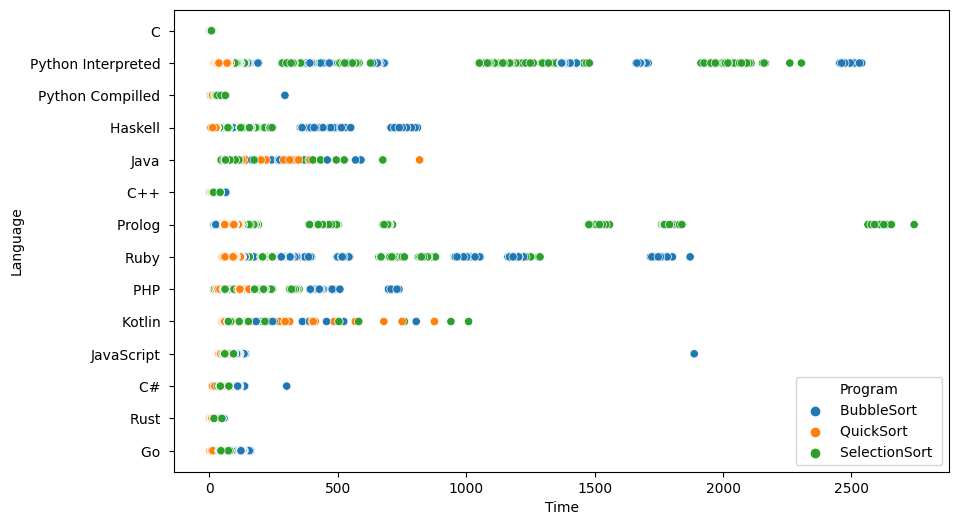

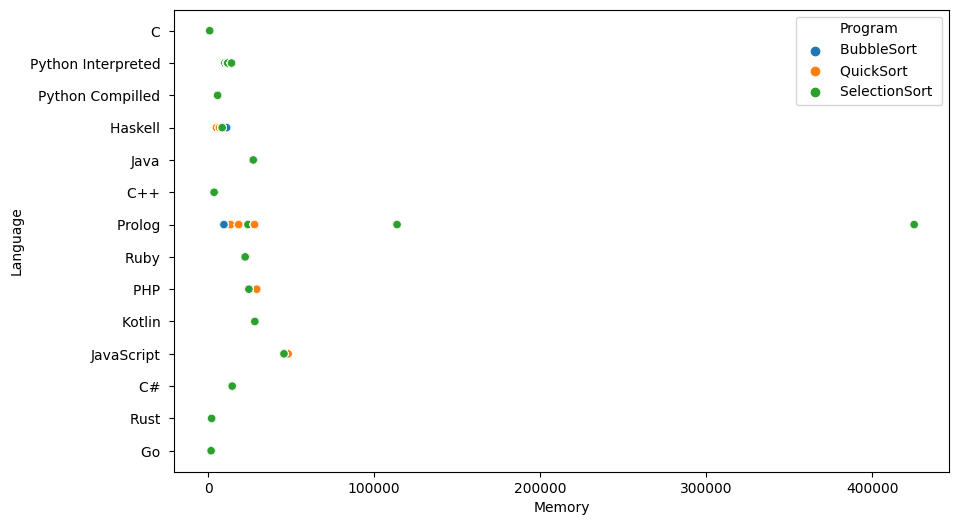

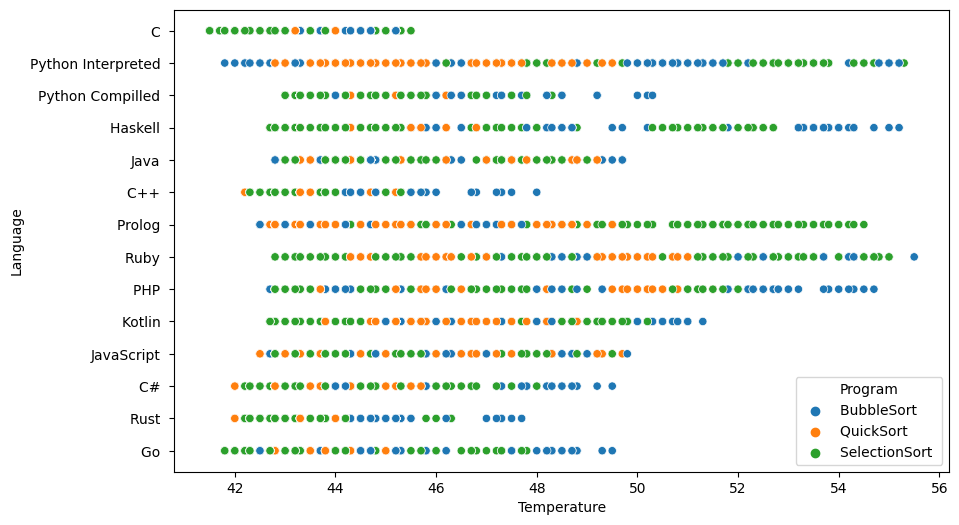

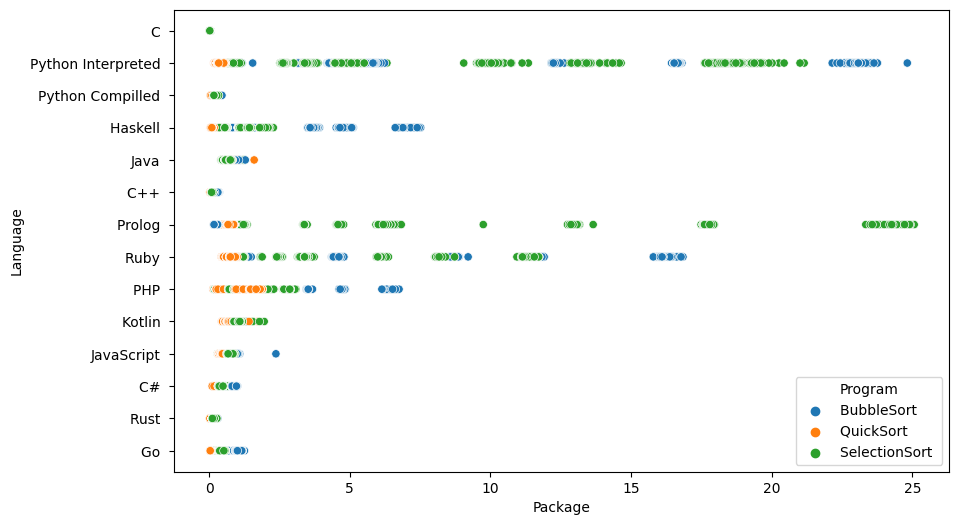

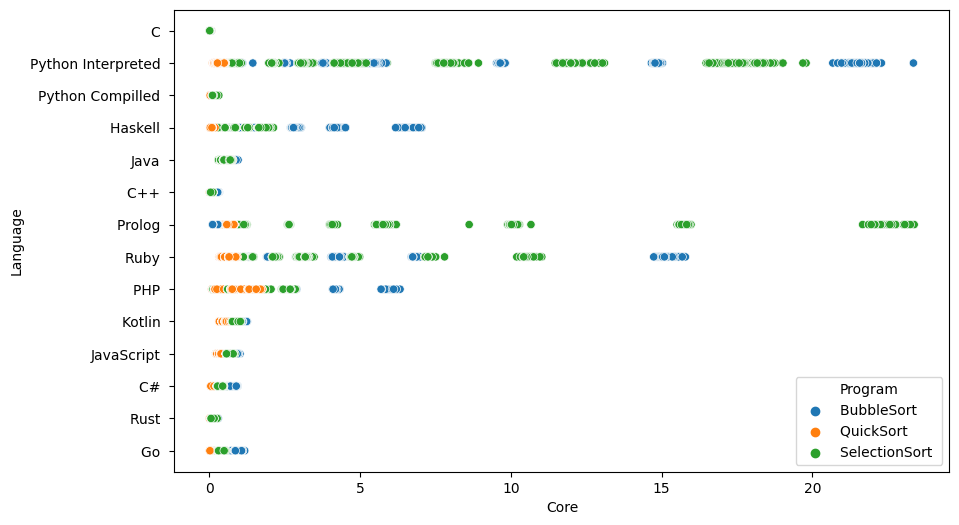

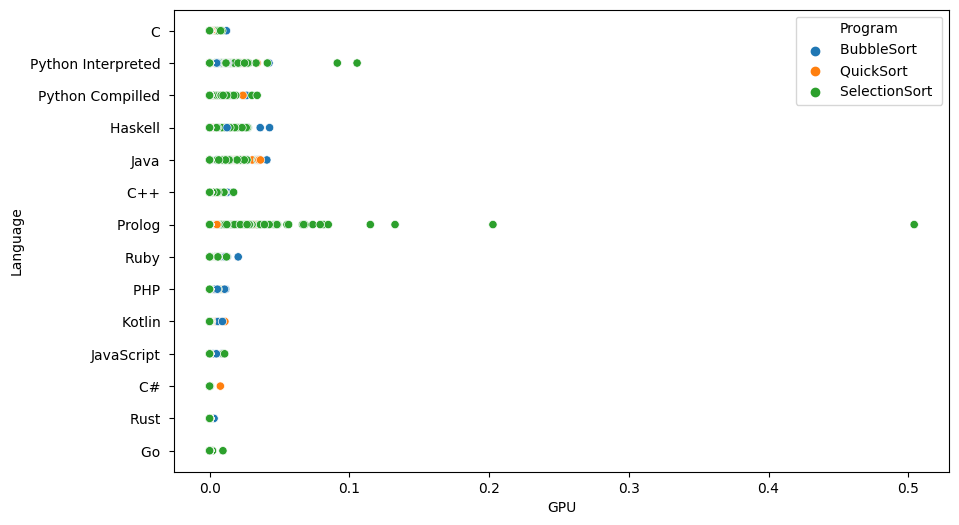

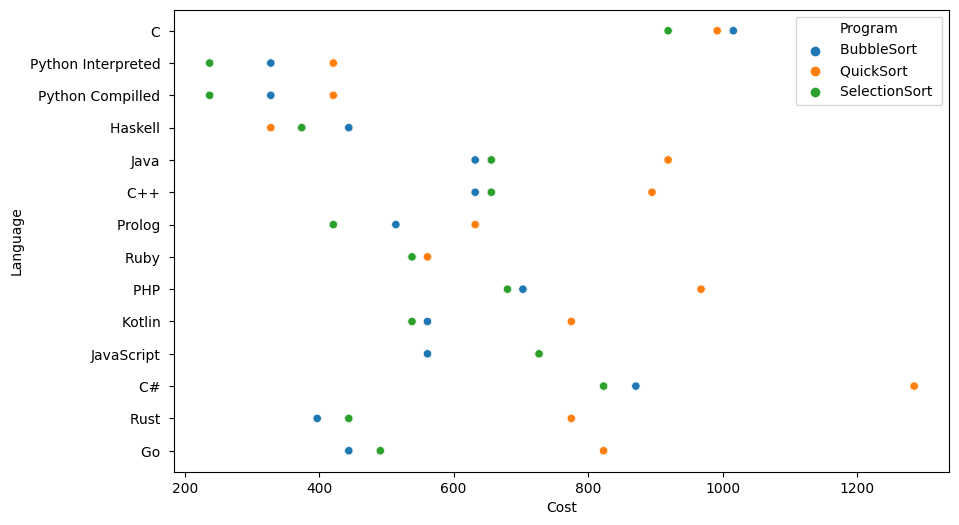

In [6]:
# estatísticas básicas
import seaborn as sea
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


file_name = '../measurements.csv'
df = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".")
for col in ["Time", "Memory", "Temperature", "Package", "Core", "GPU","Cost"]:
    plt.figure(figsize=(10,6))
    sea.scatterplot(data=df,hue='Program',y='Language', x=col)

# estatísticas básicas (descritivas)
# summary stats
print("Stats")
print(df.describe())

In [7]:
df = df.drop(['GPU', 'Core'], axis=1)

In [8]:
#Guardar medias para csv
grouped_table = df[df['Size'] == 5000].drop('Size', axis=1).groupby(['Program','Language', 'PowerLimit']).mean()
grouped_table.to_csv('filteredData.csv')

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


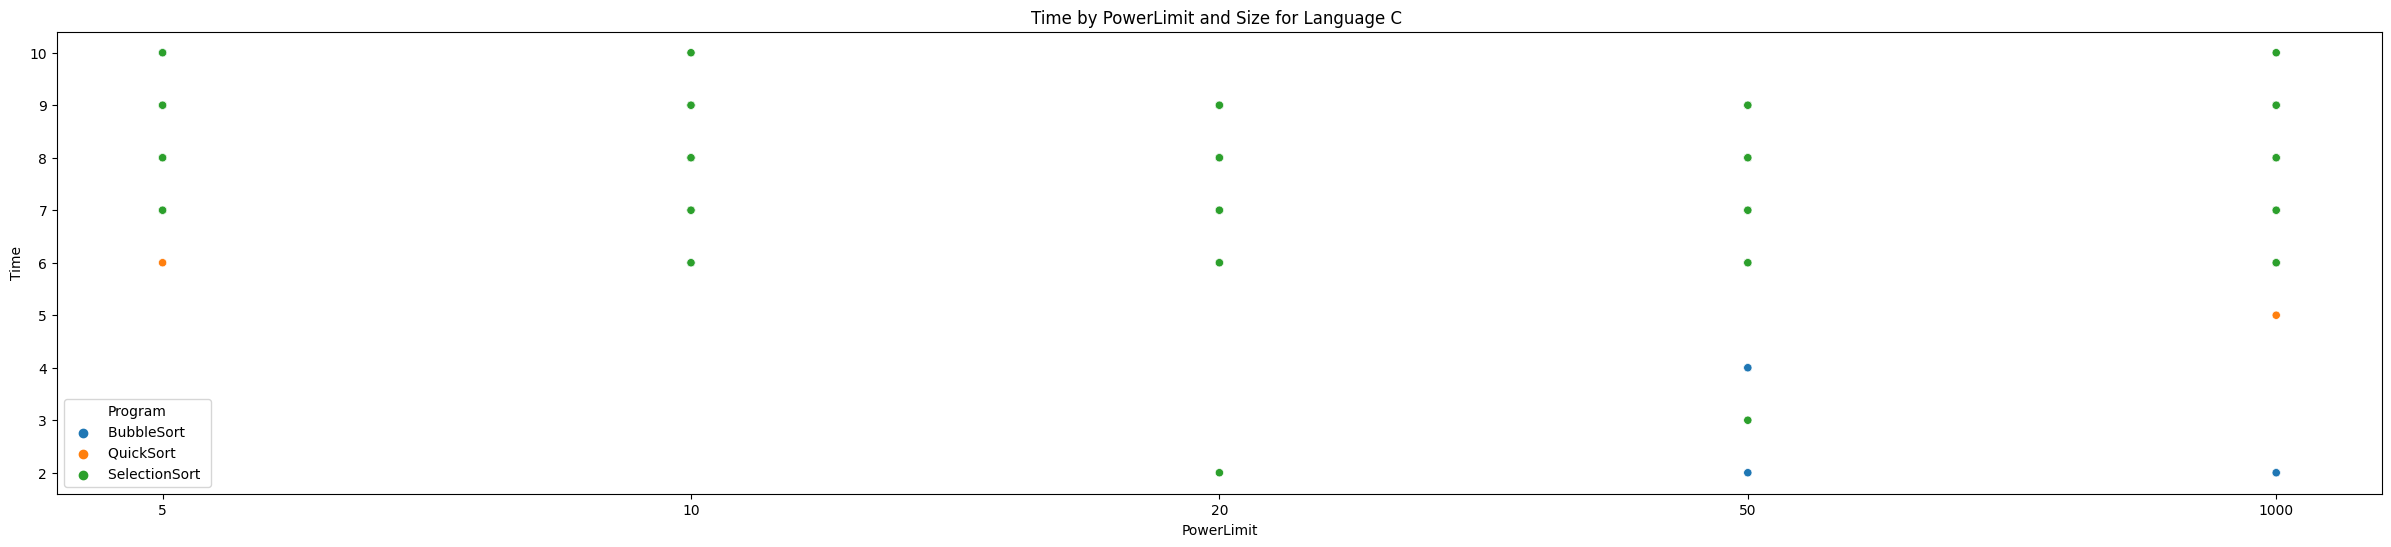

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


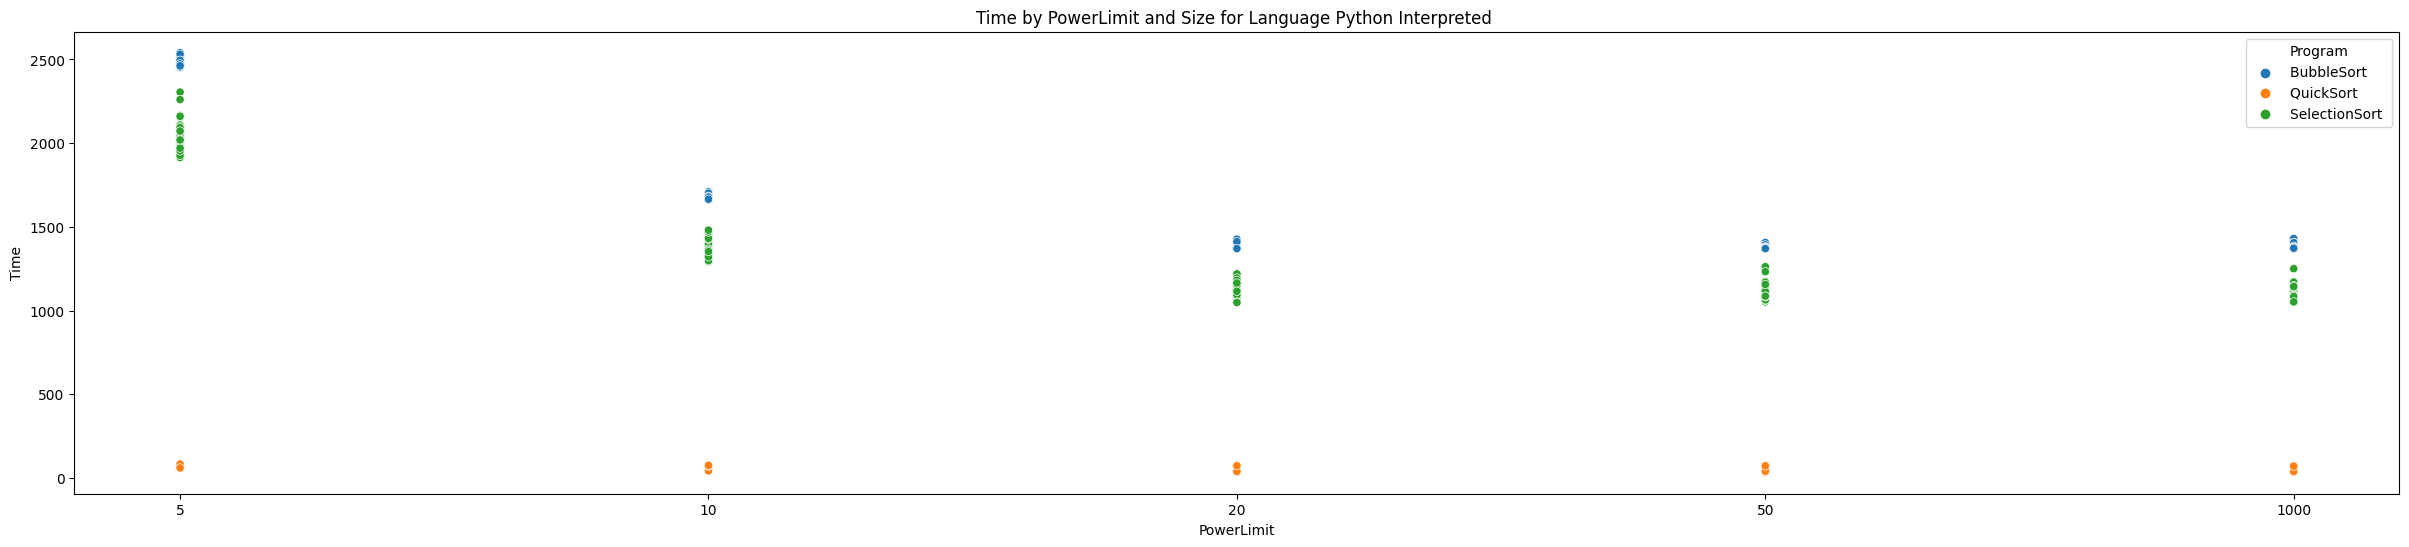

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


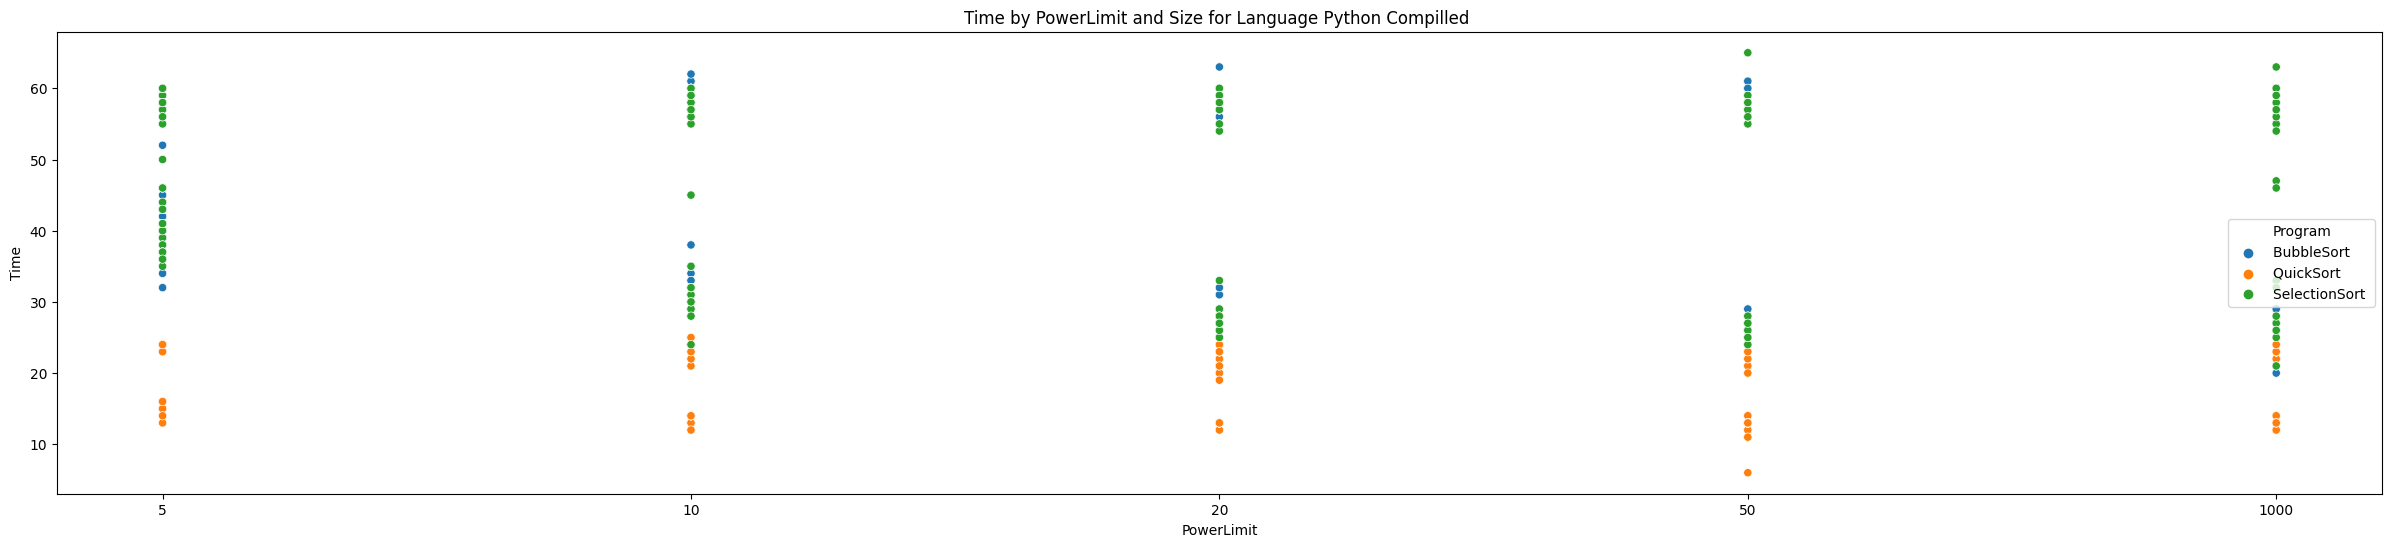

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


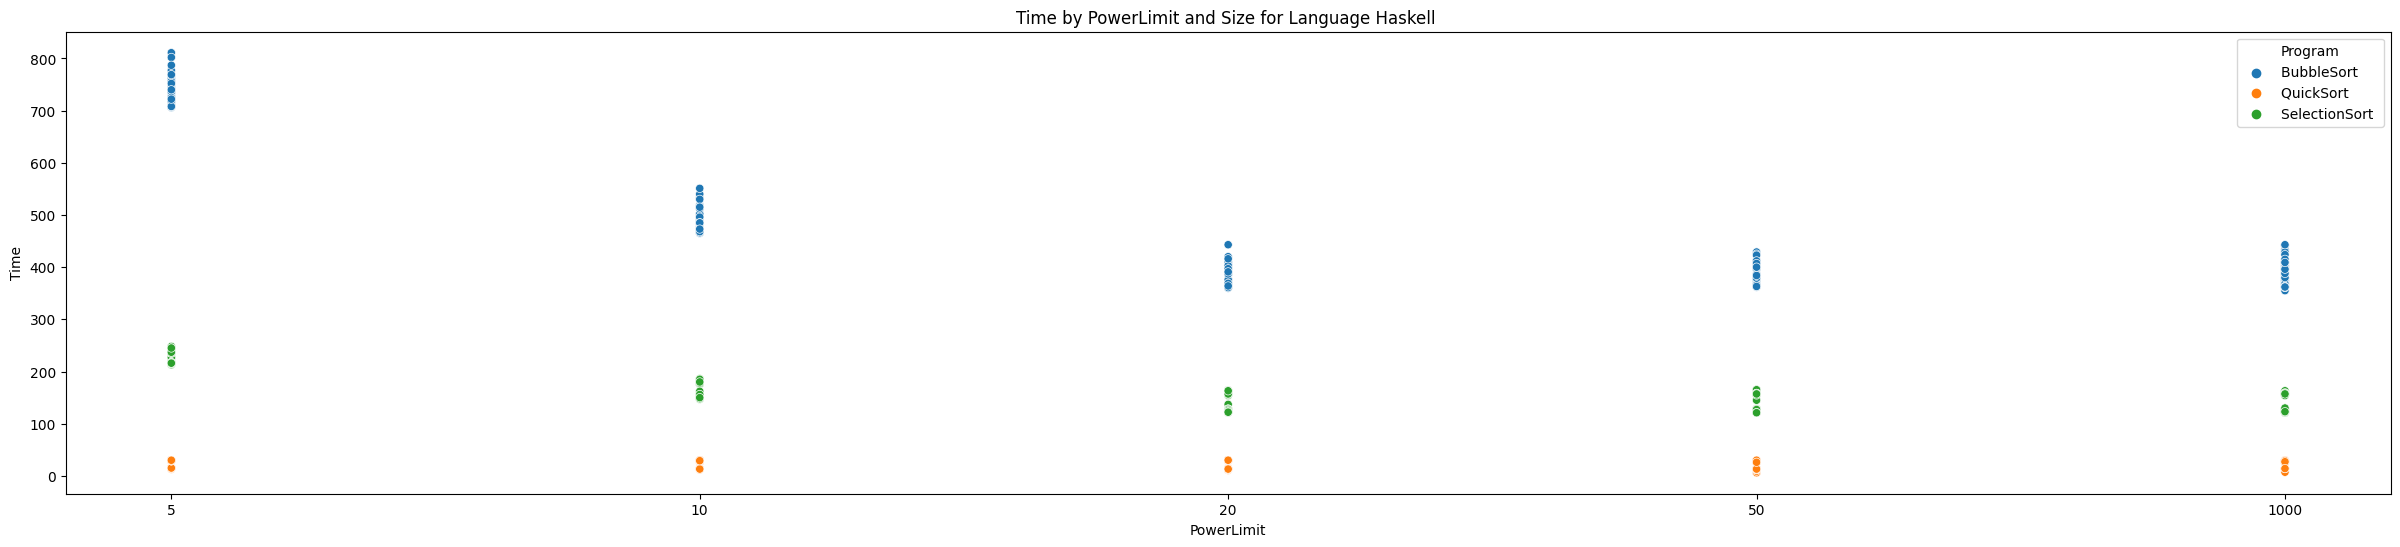

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


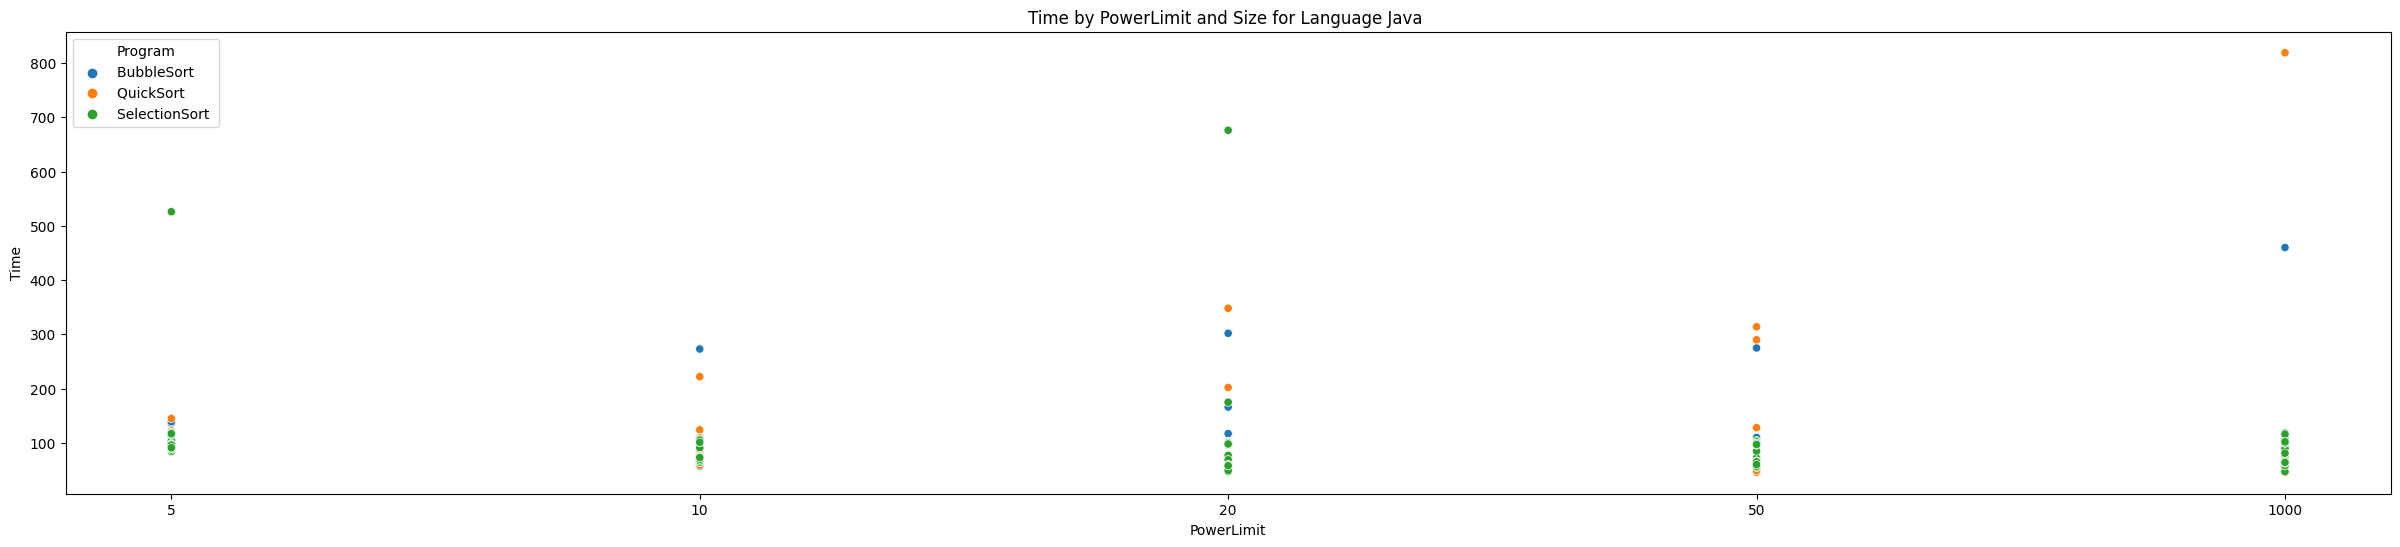

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


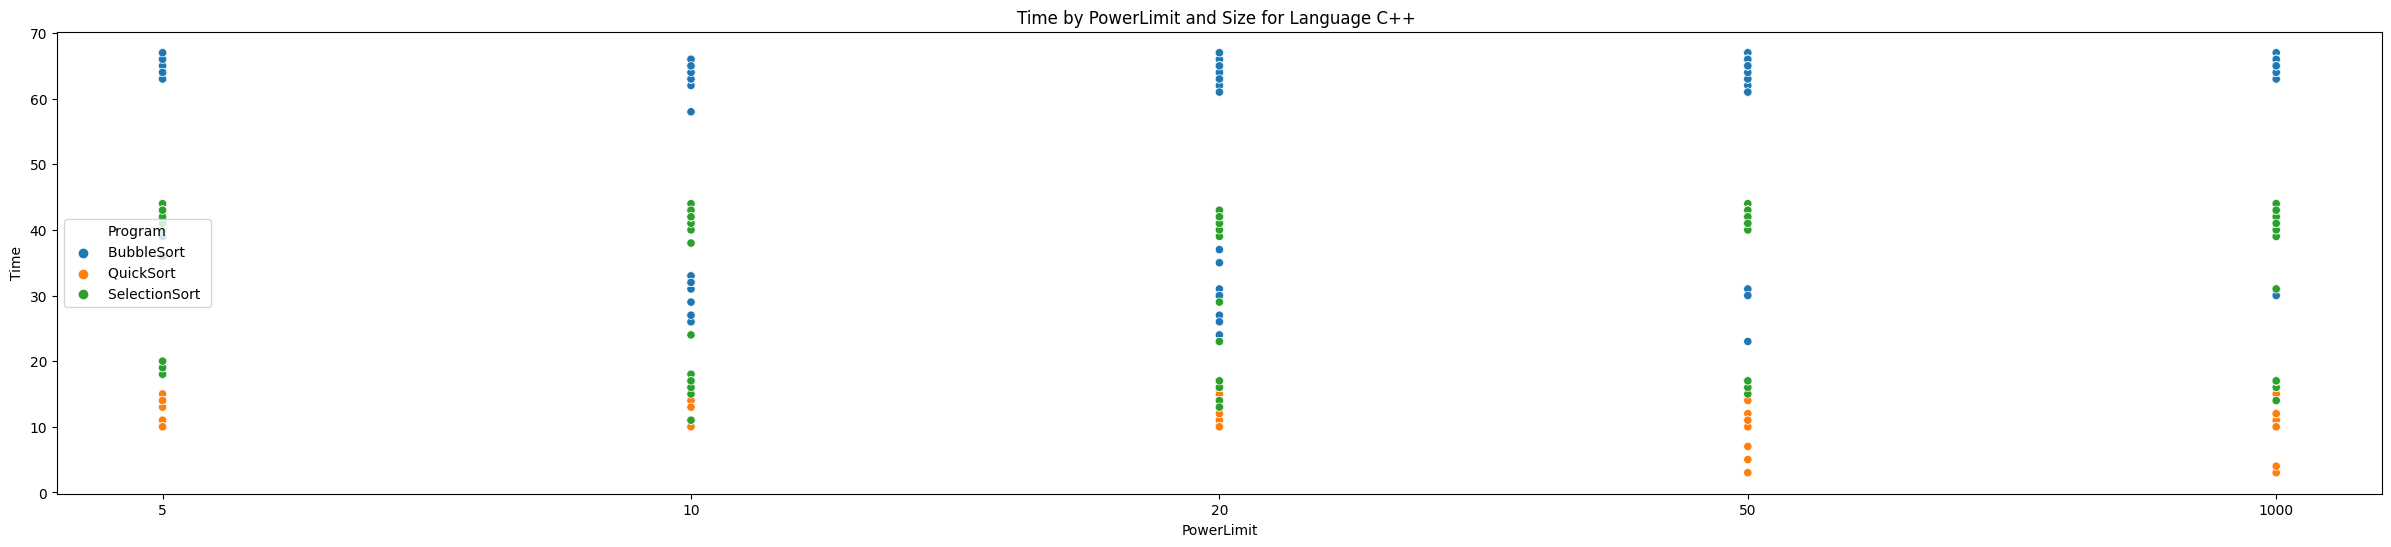

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


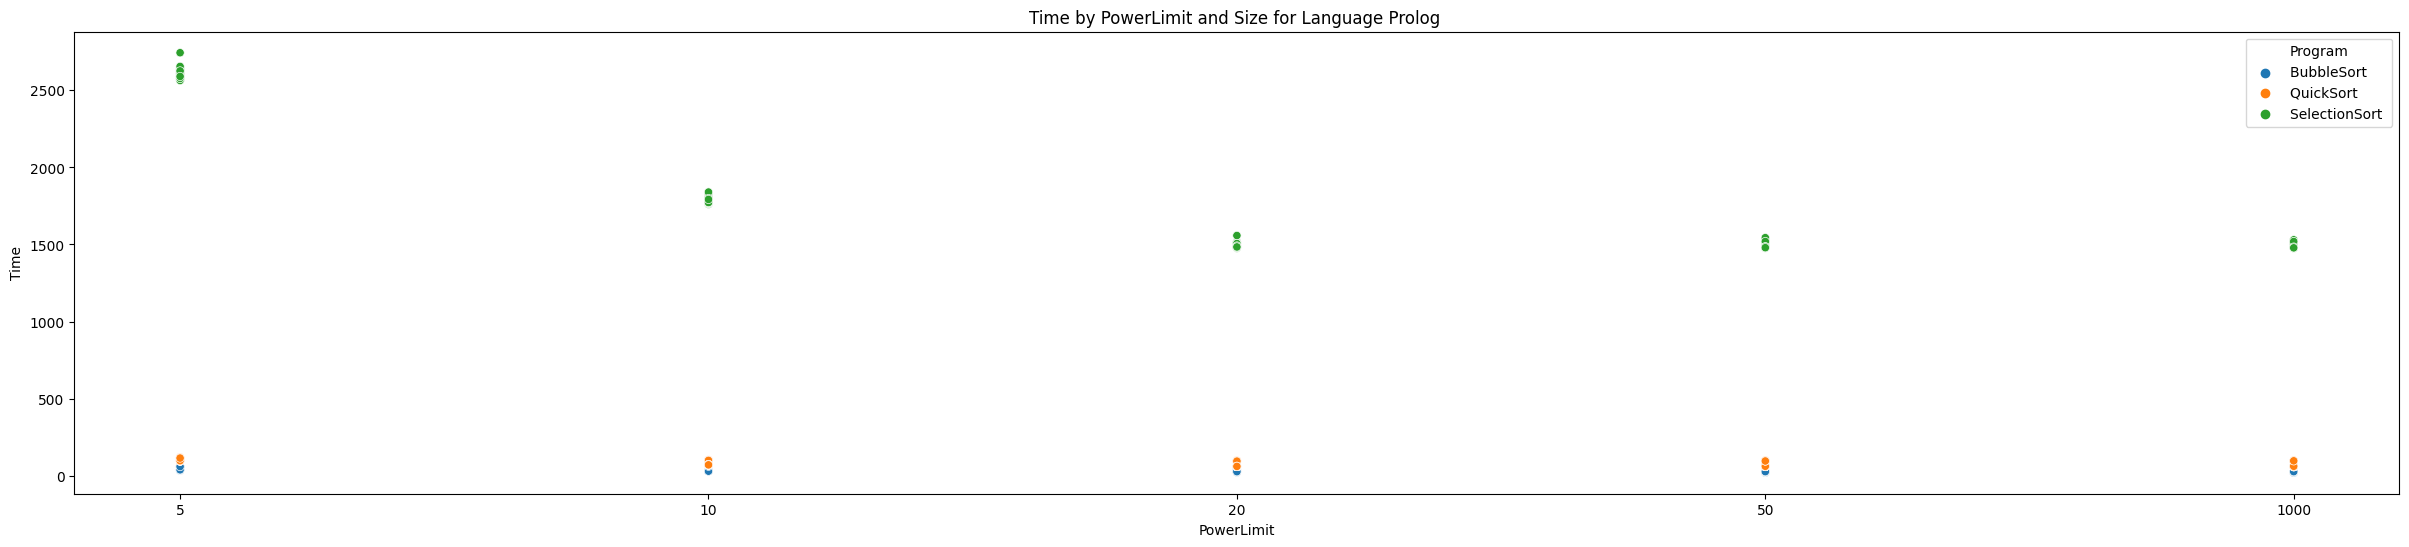

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


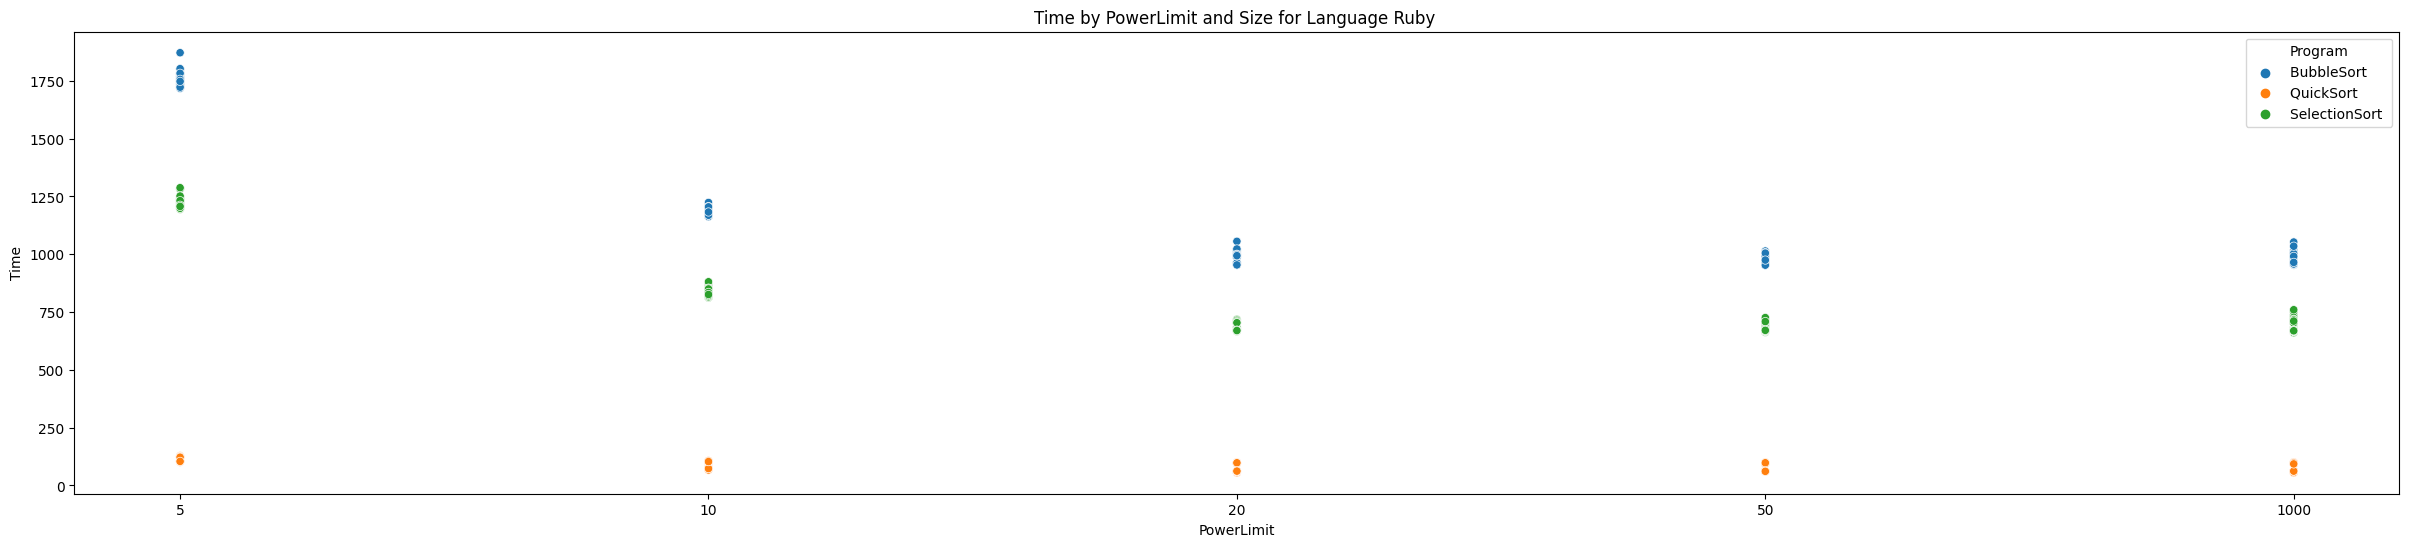

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


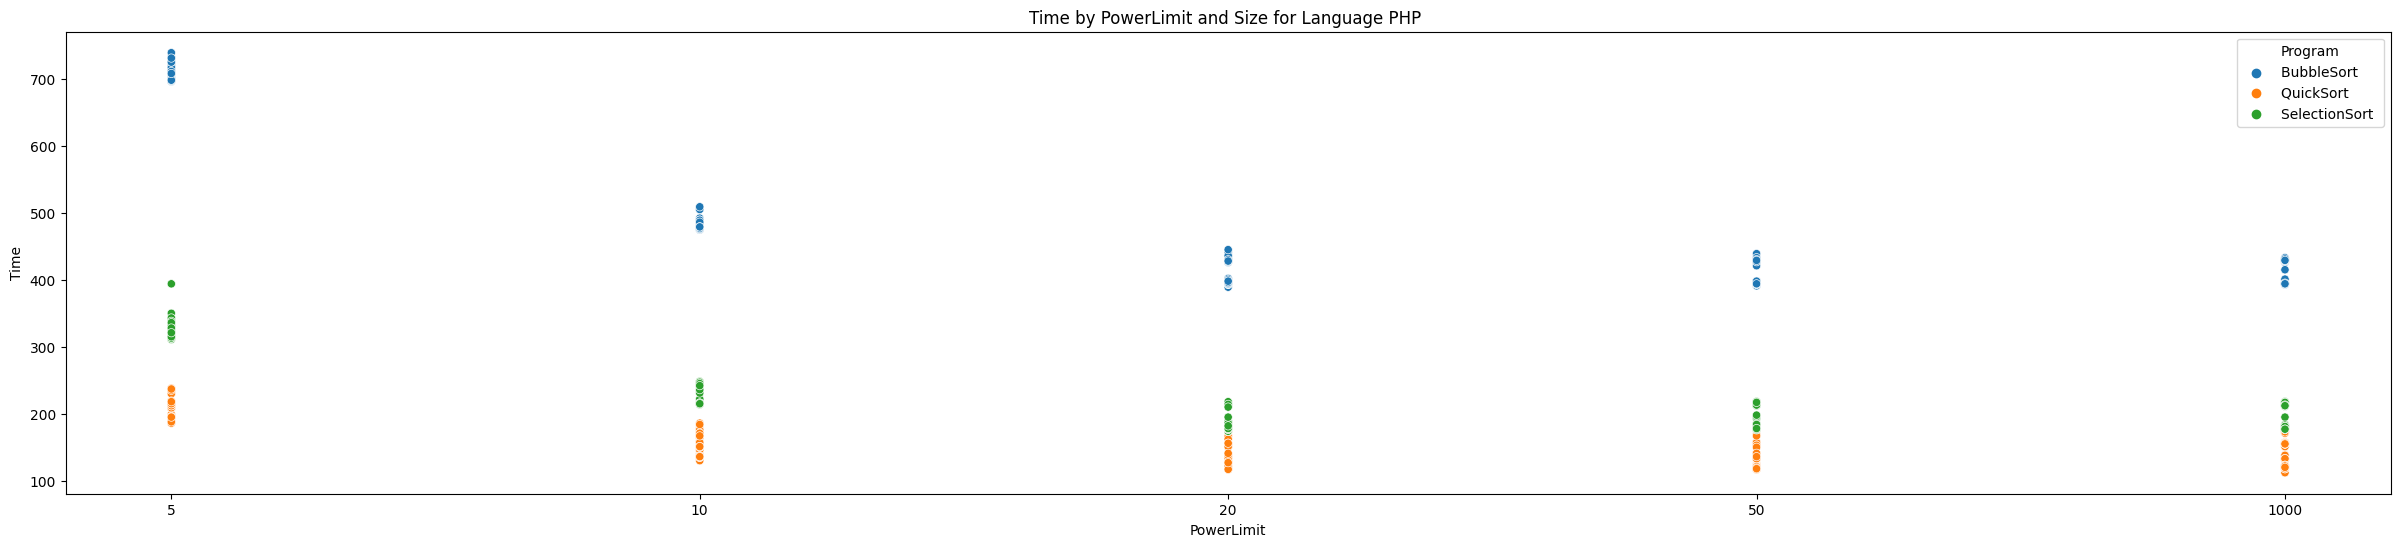

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


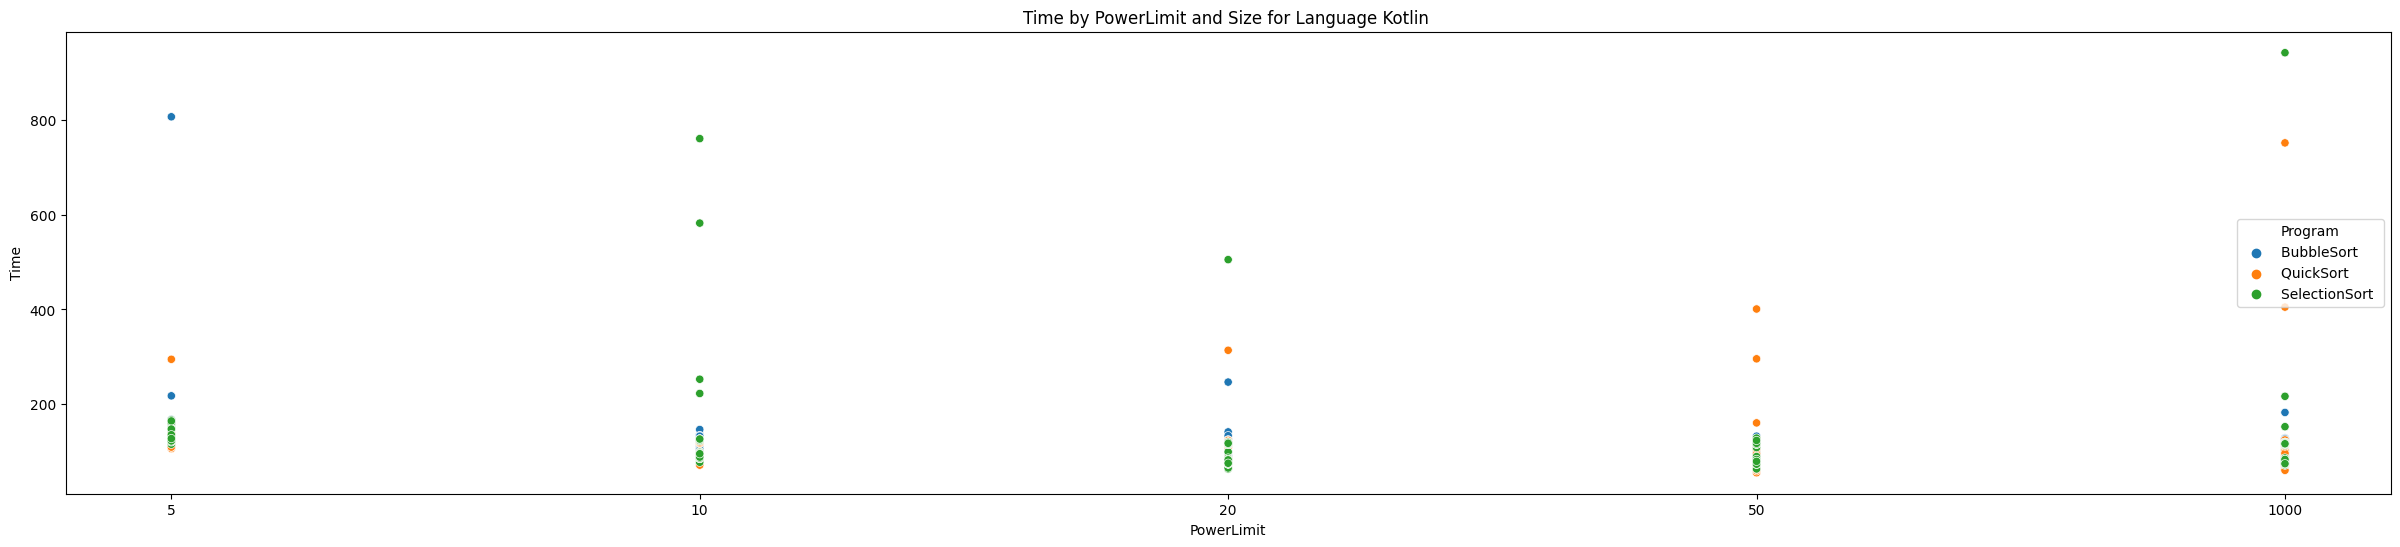

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


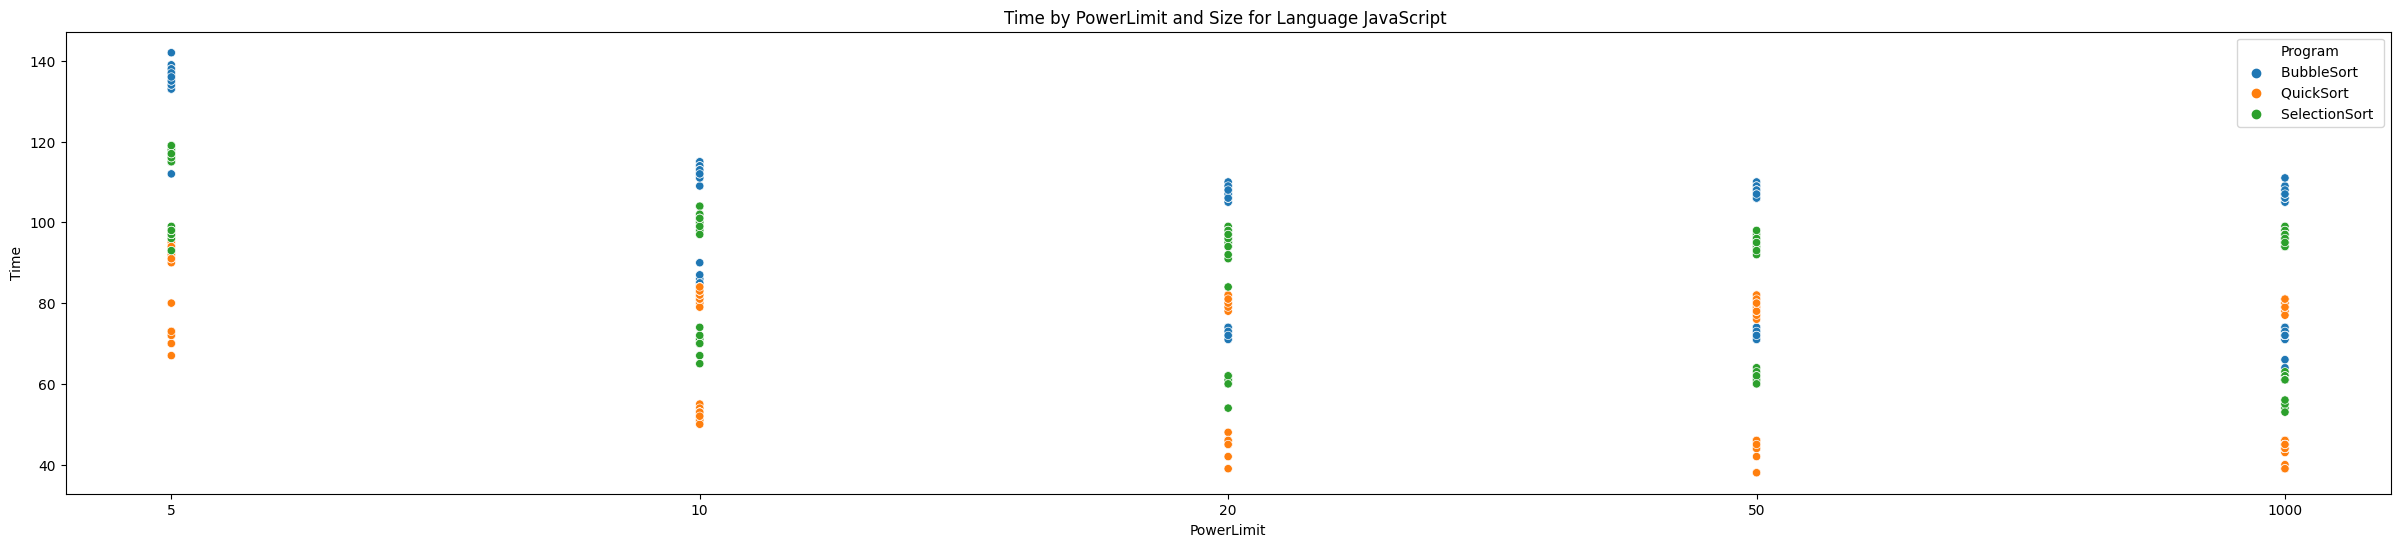

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


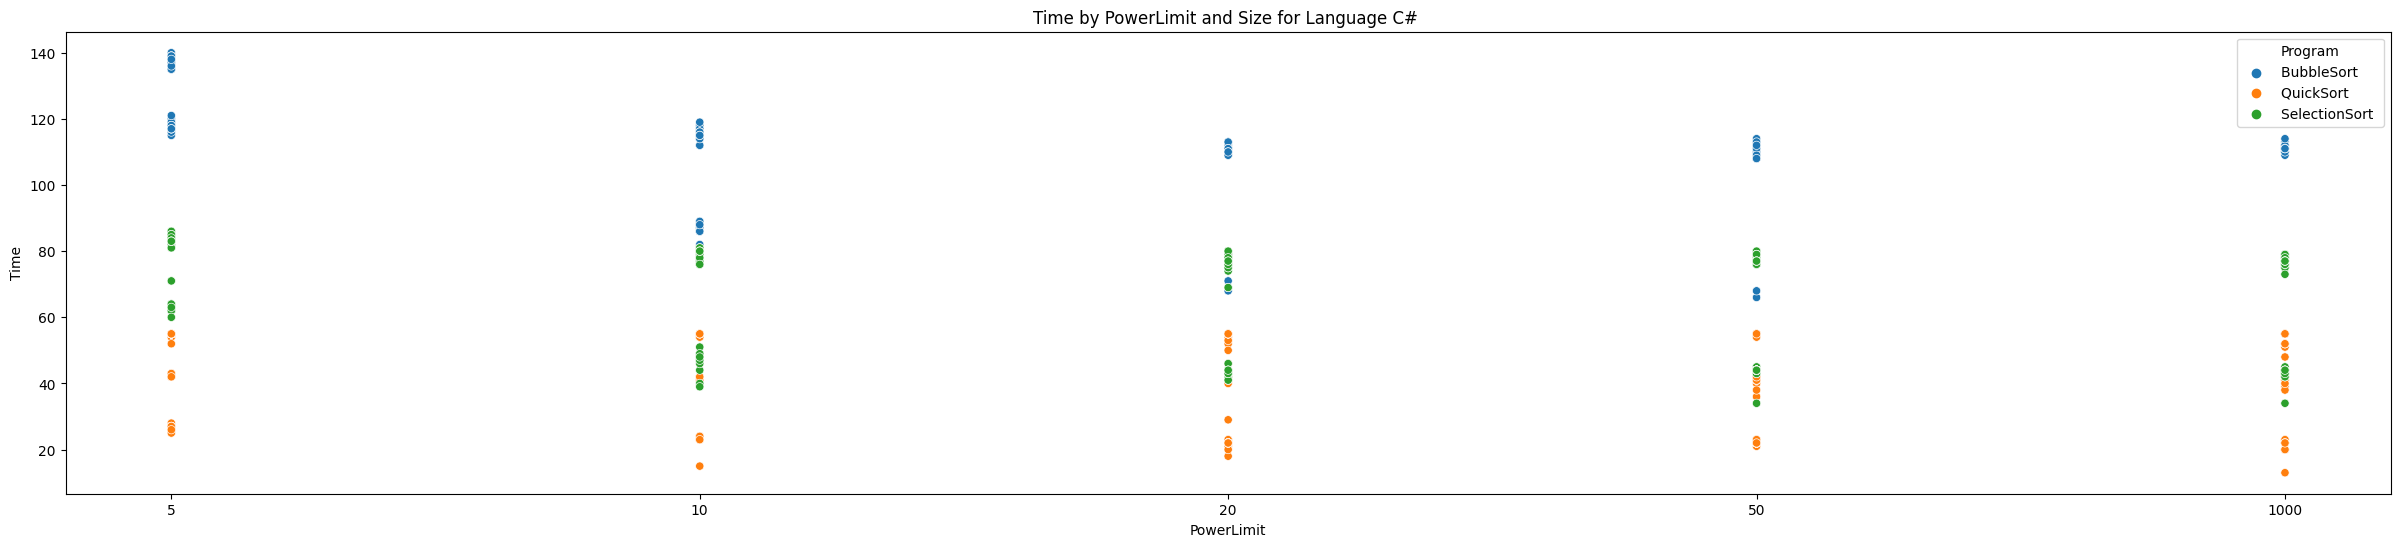

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


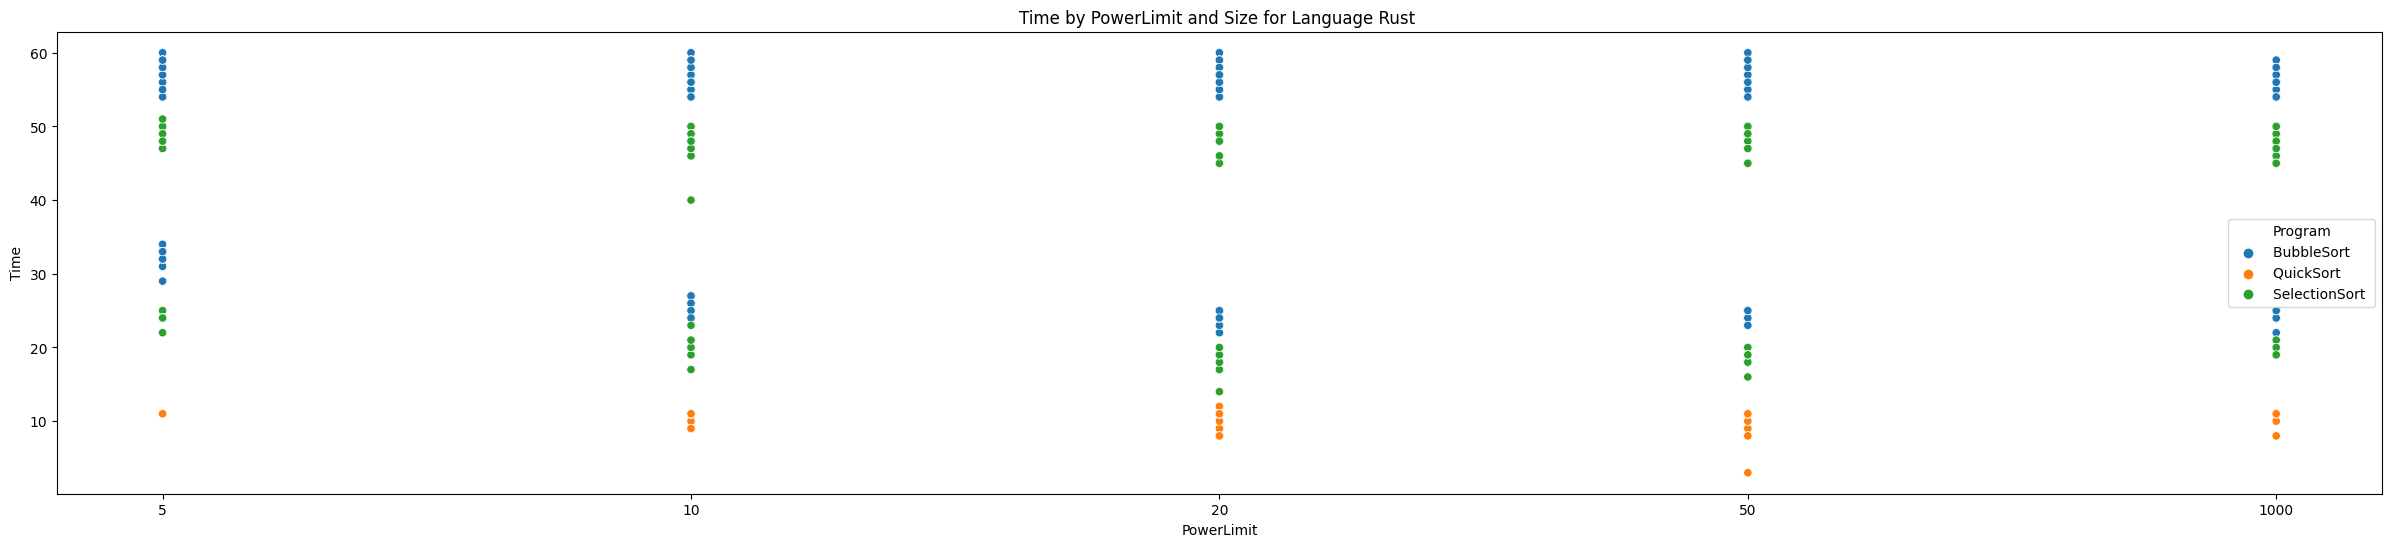

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


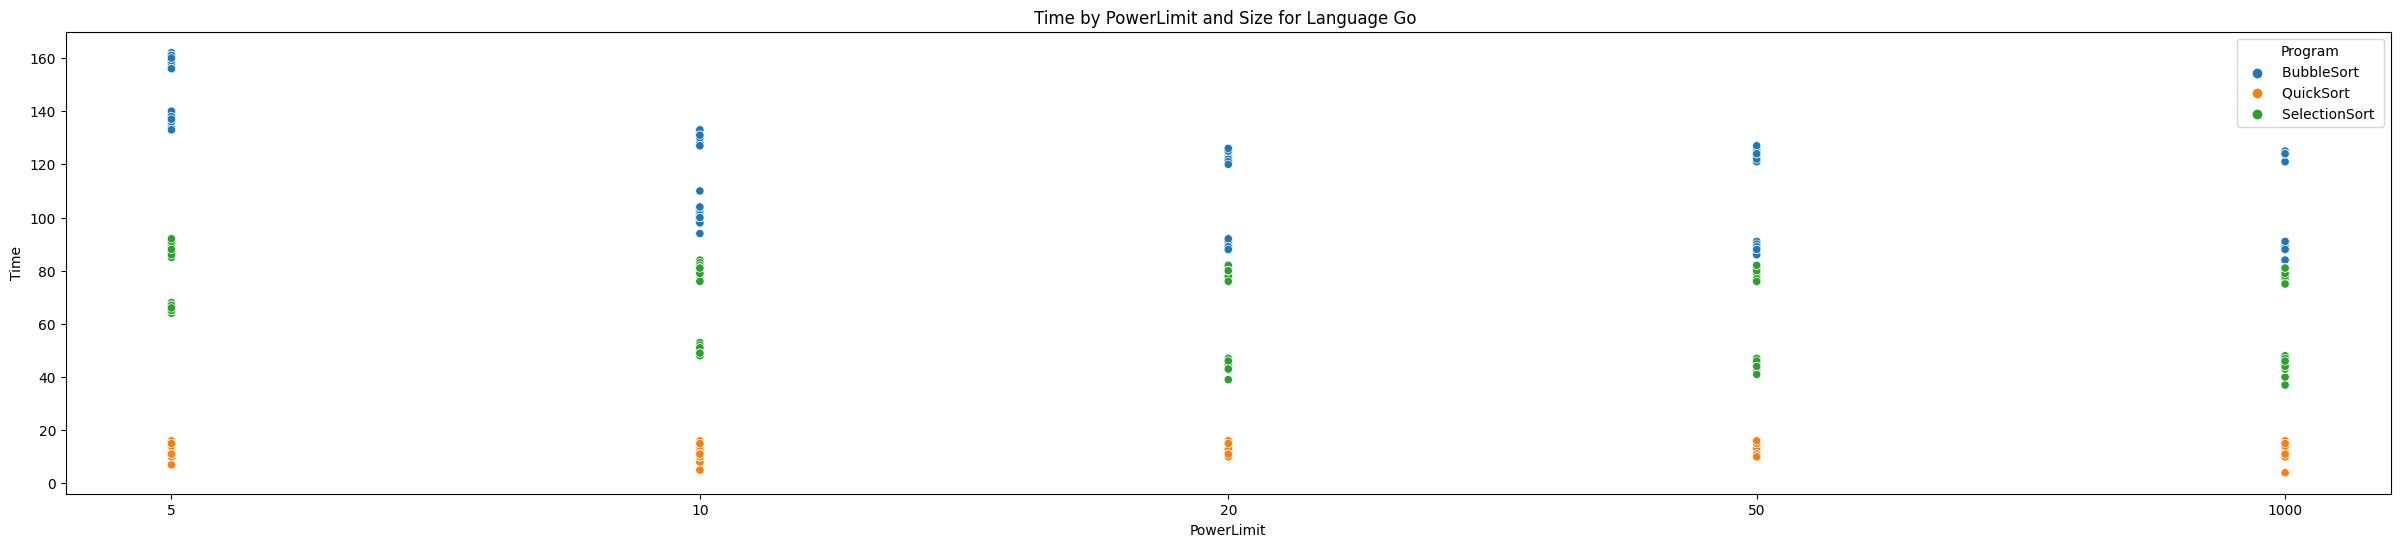

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


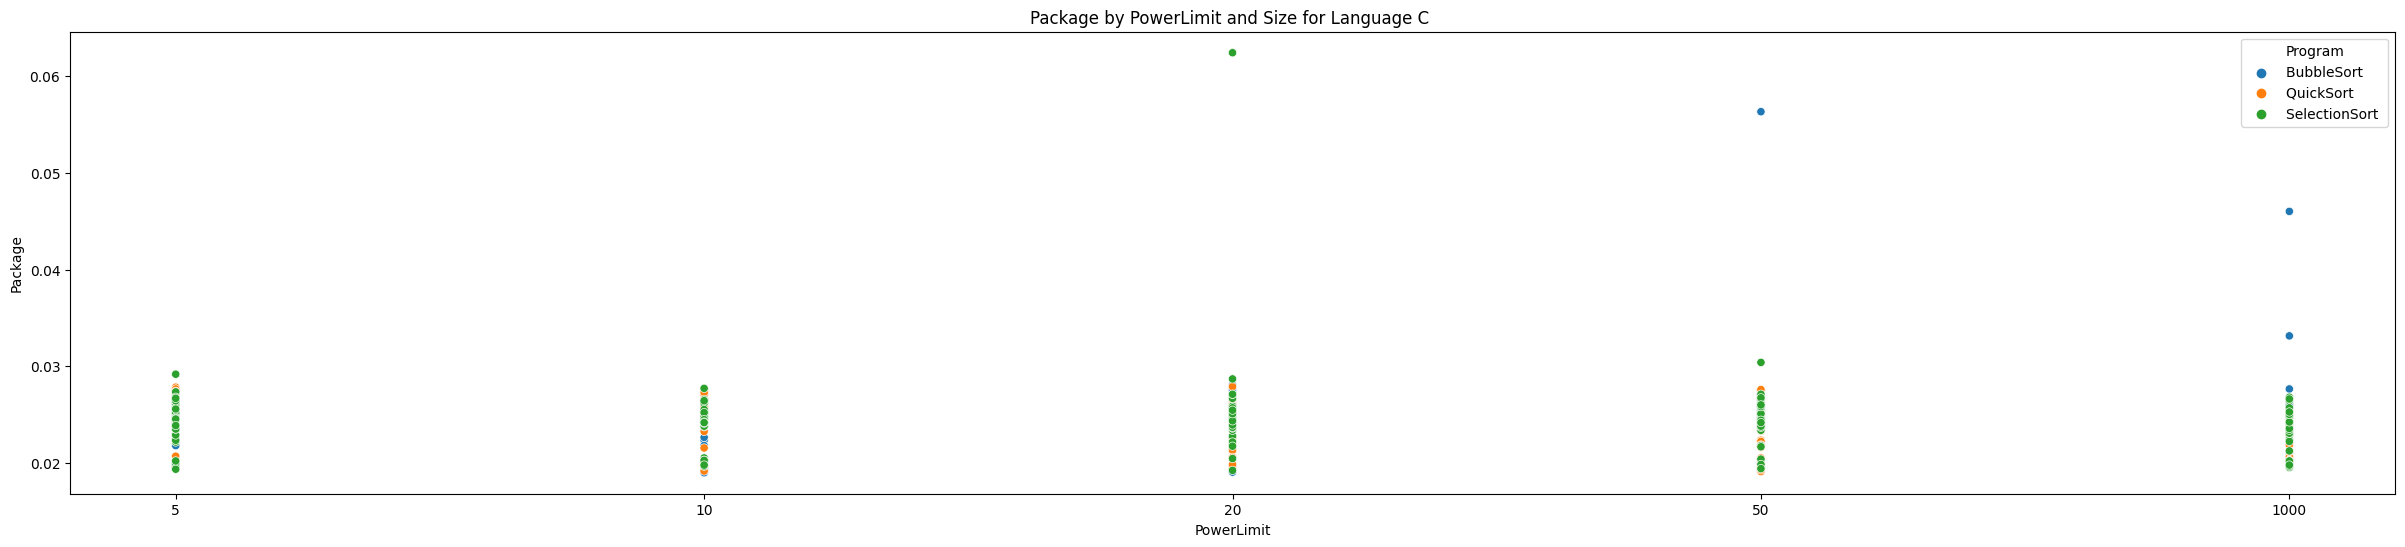

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


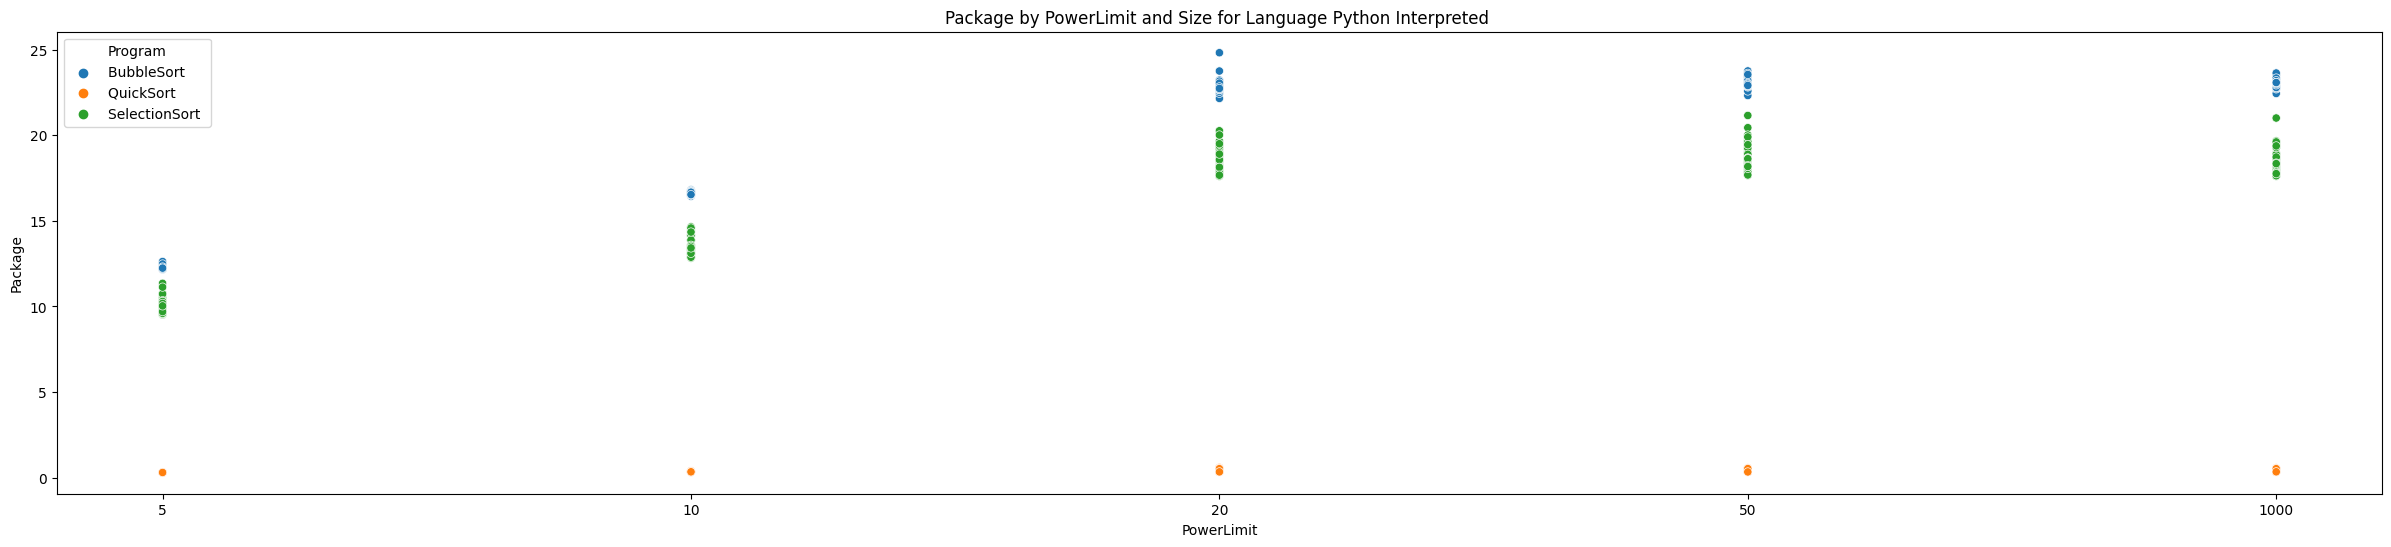

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


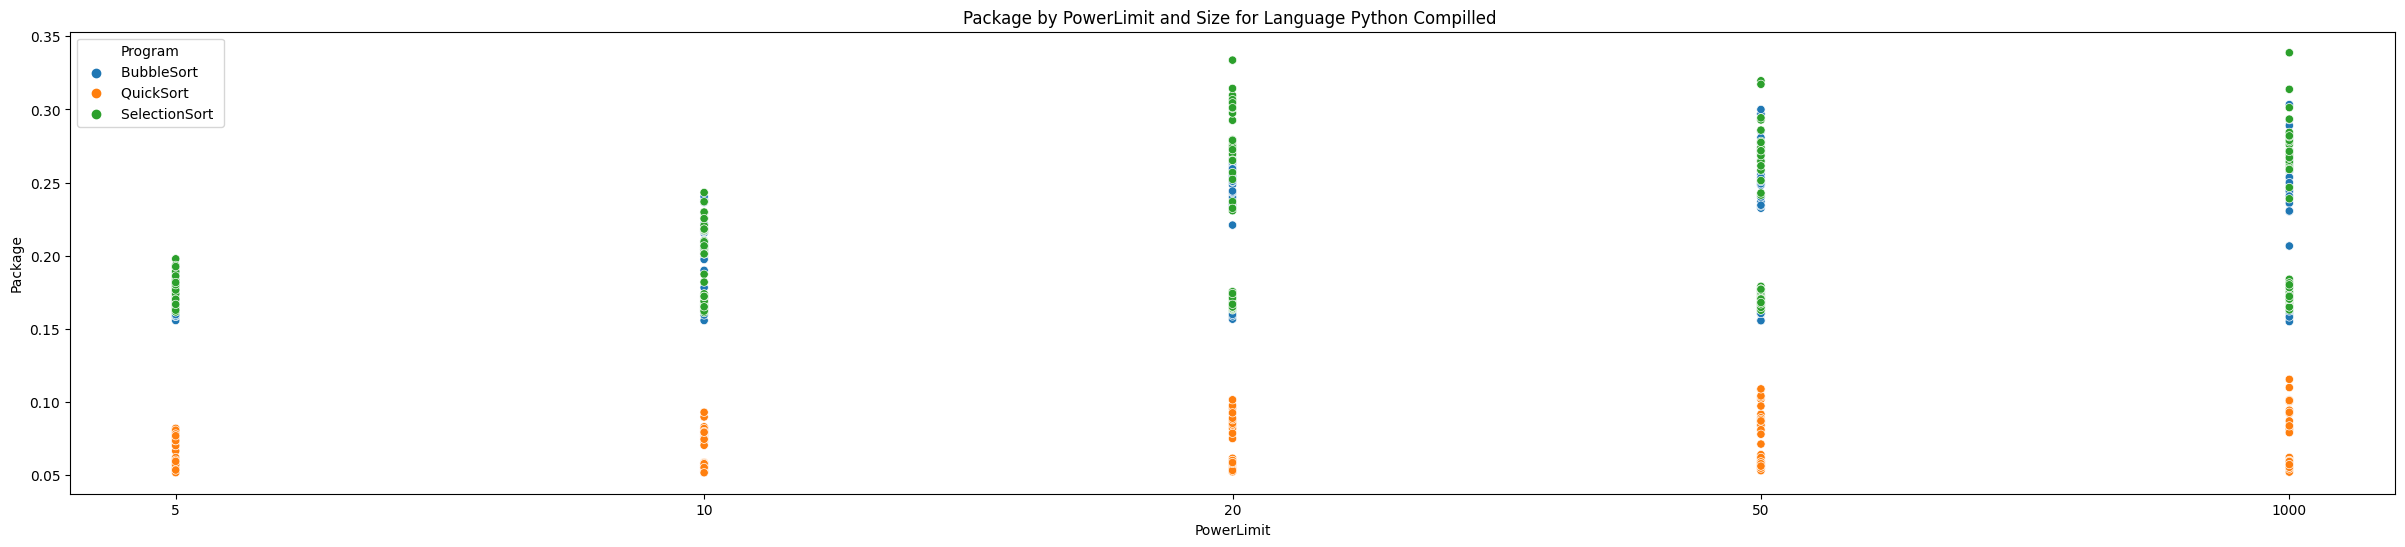

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


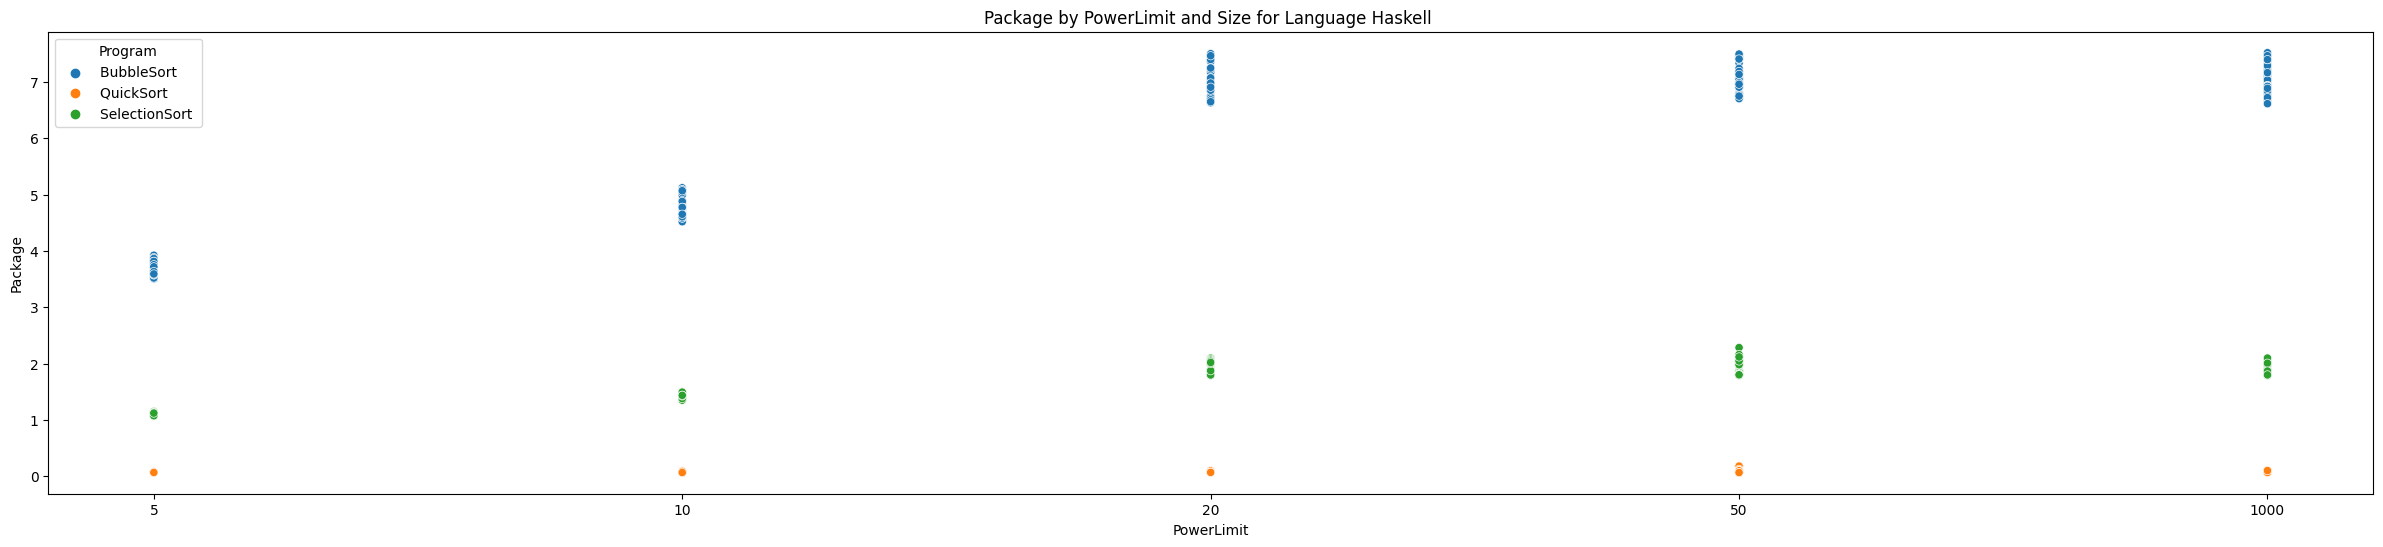

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


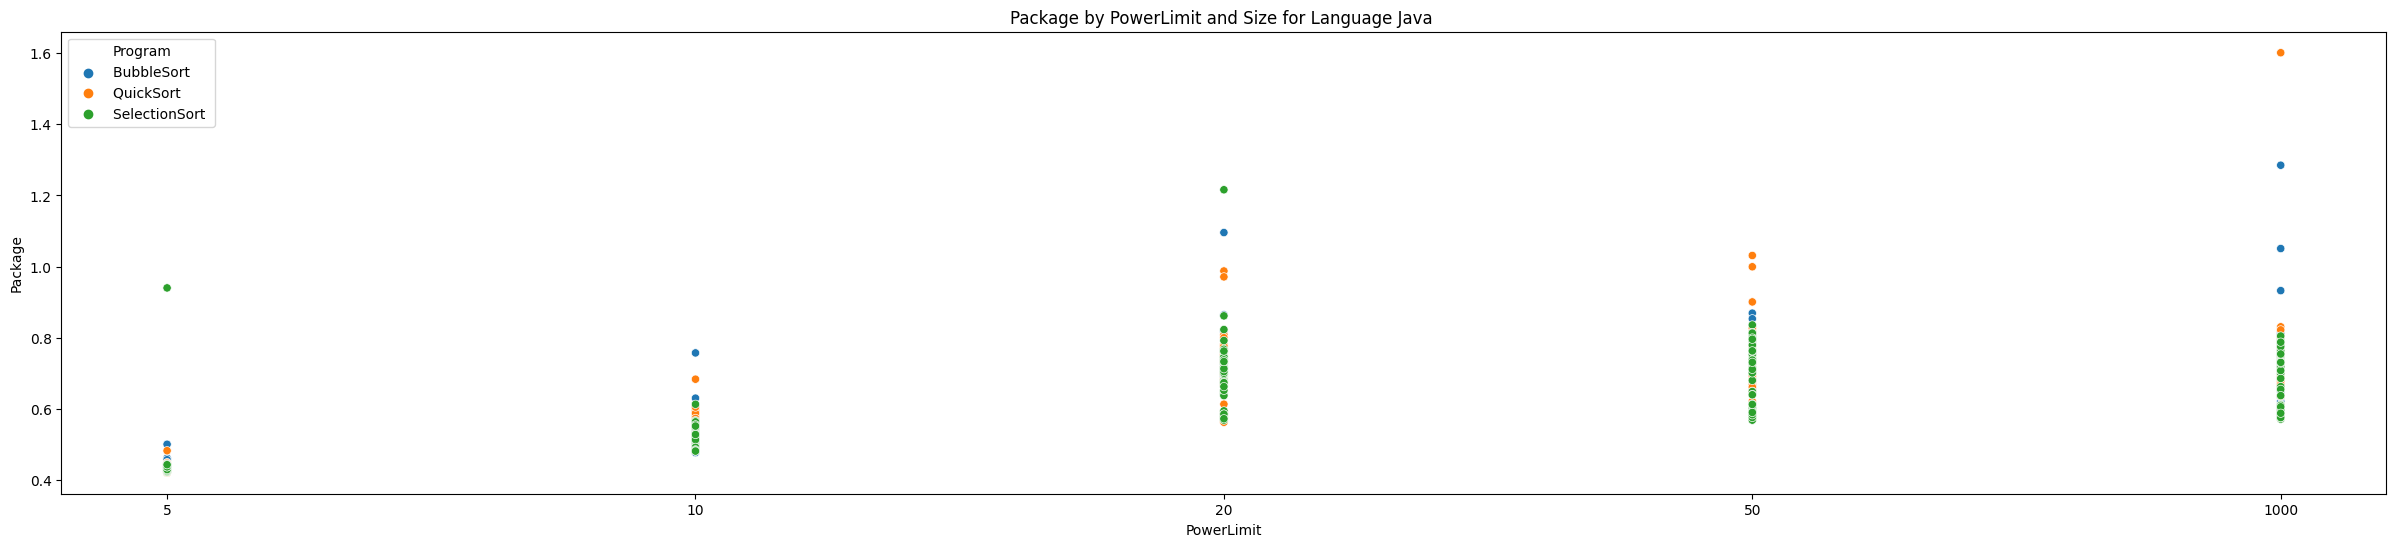

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


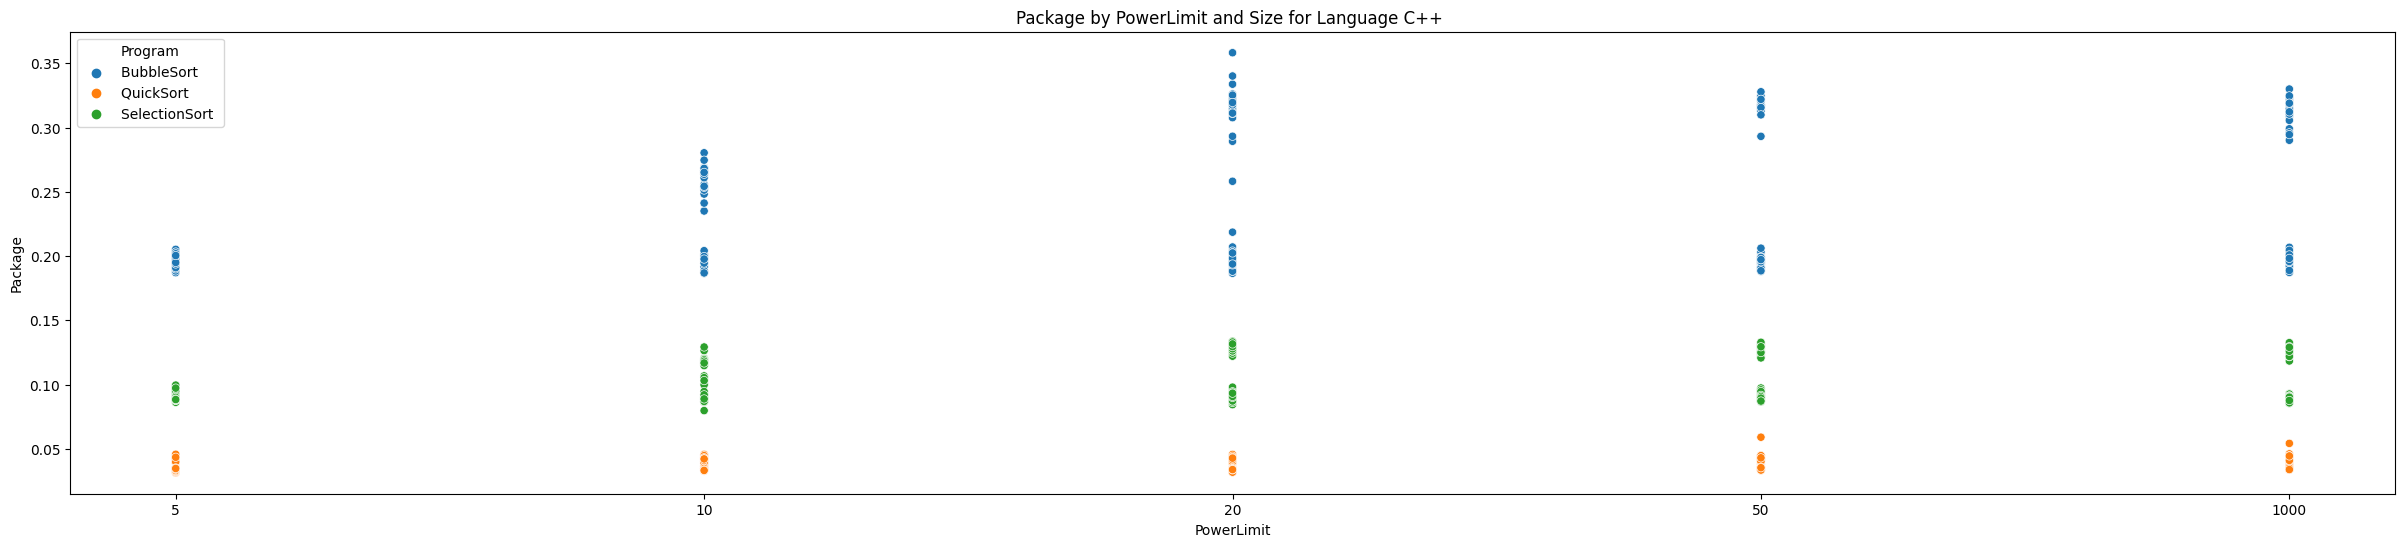

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


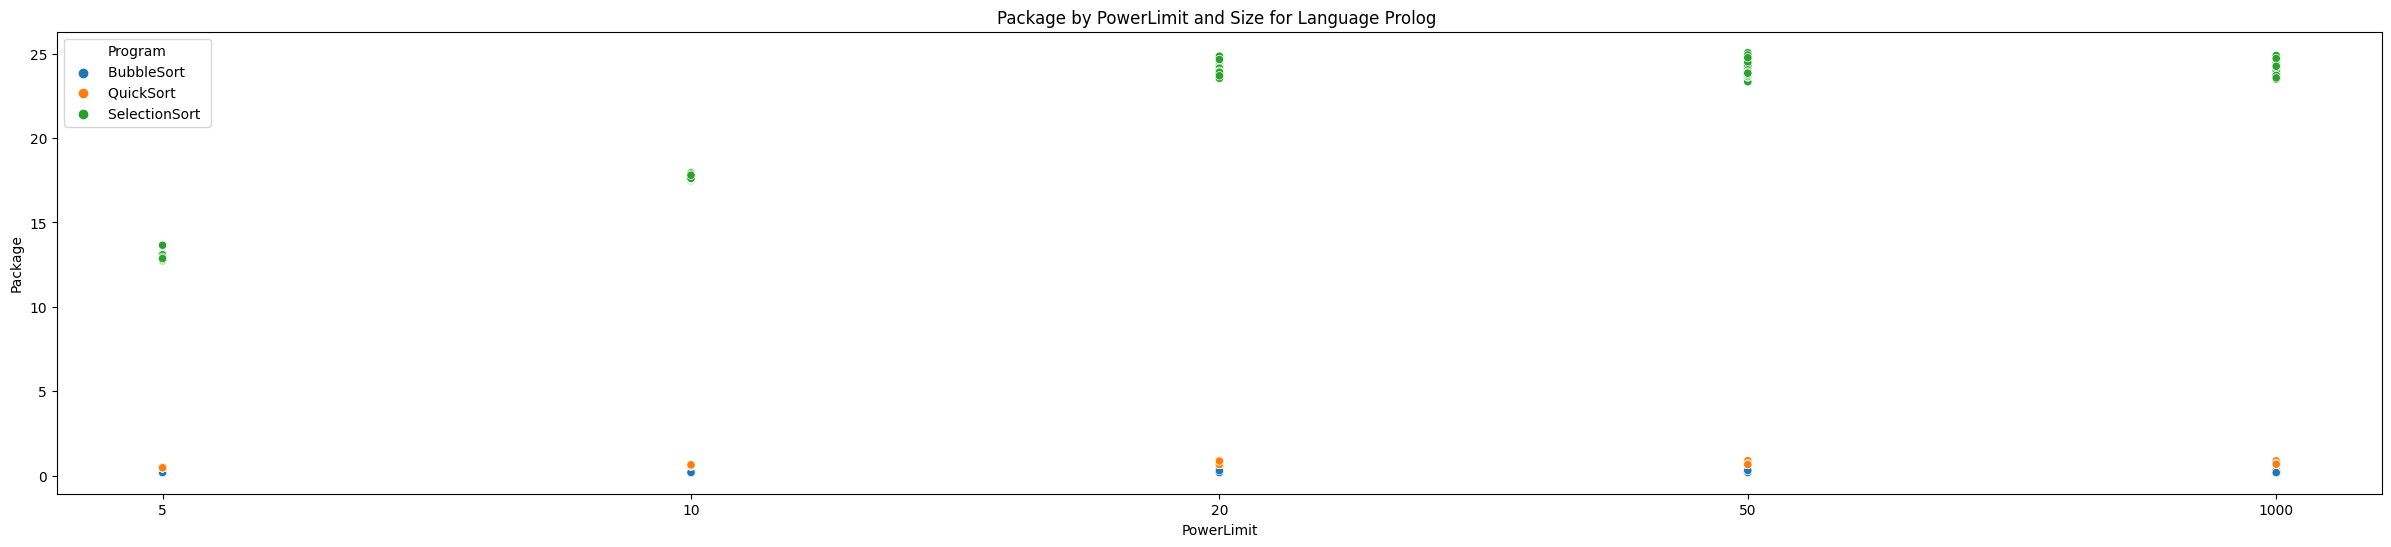

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


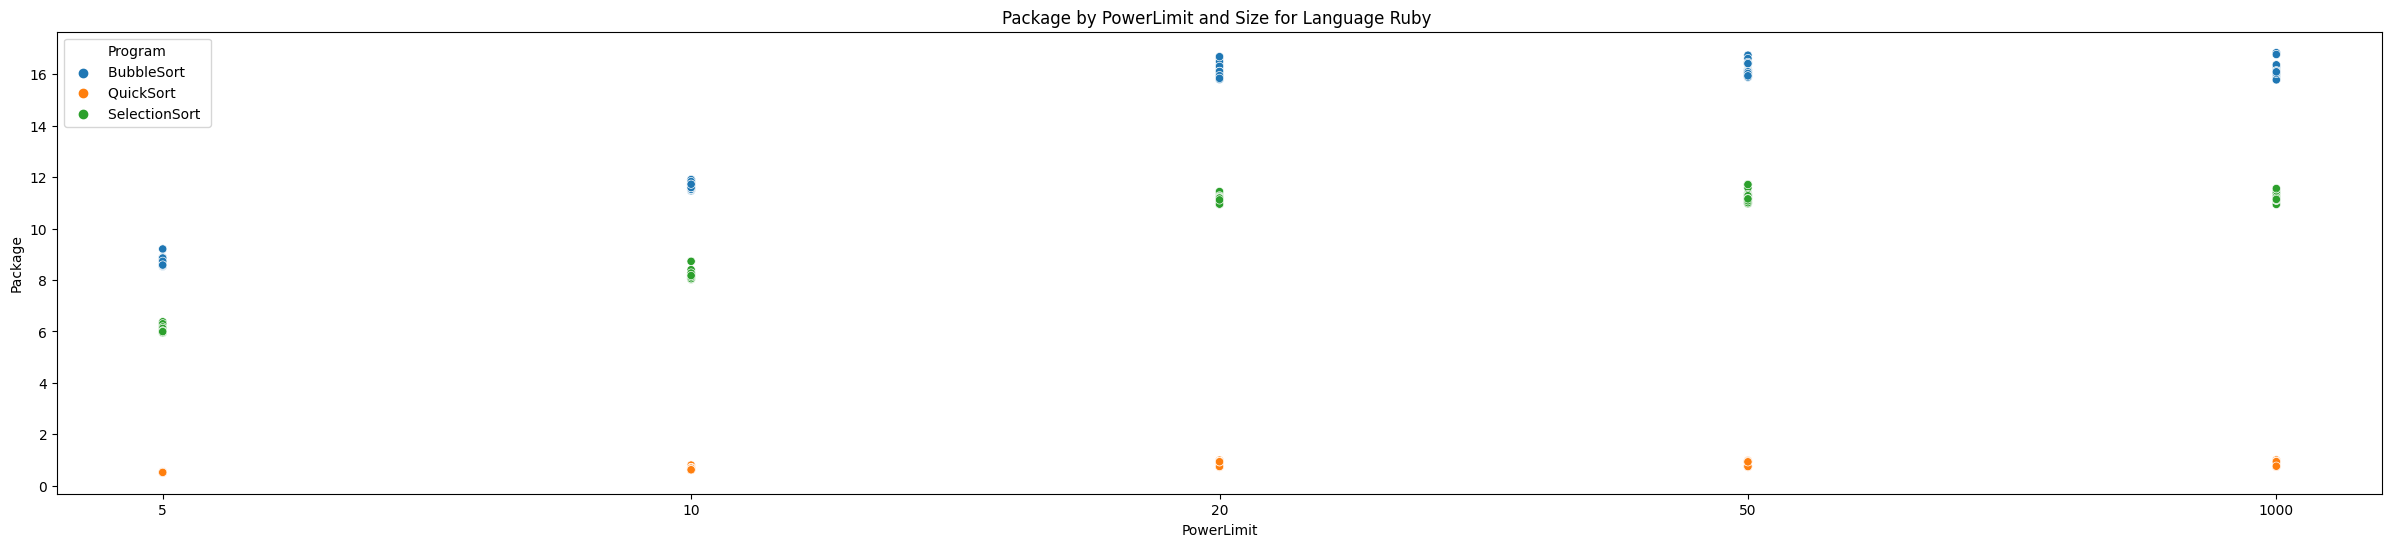

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


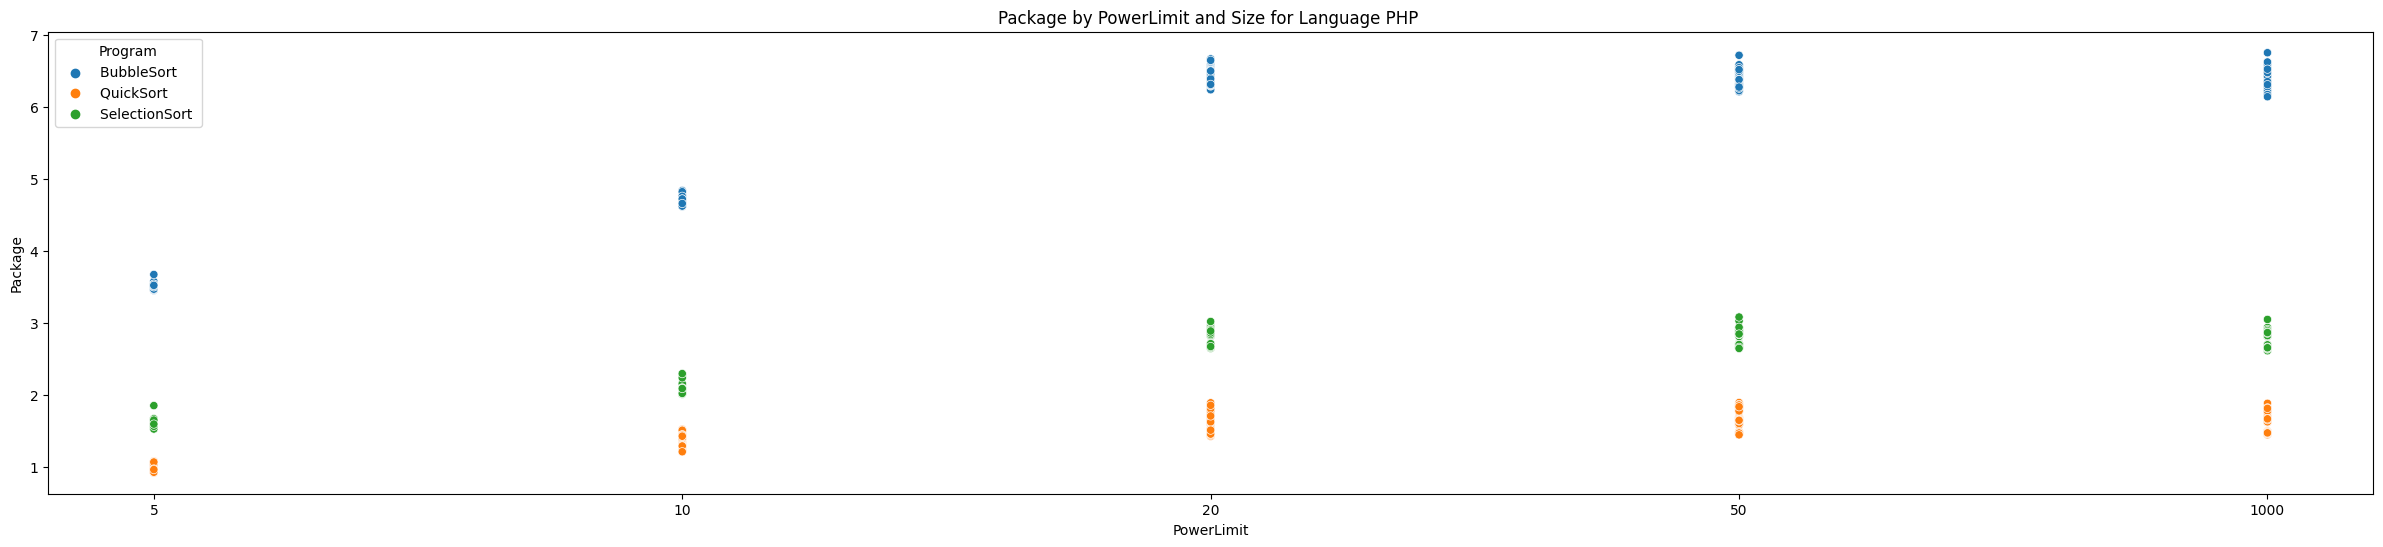

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


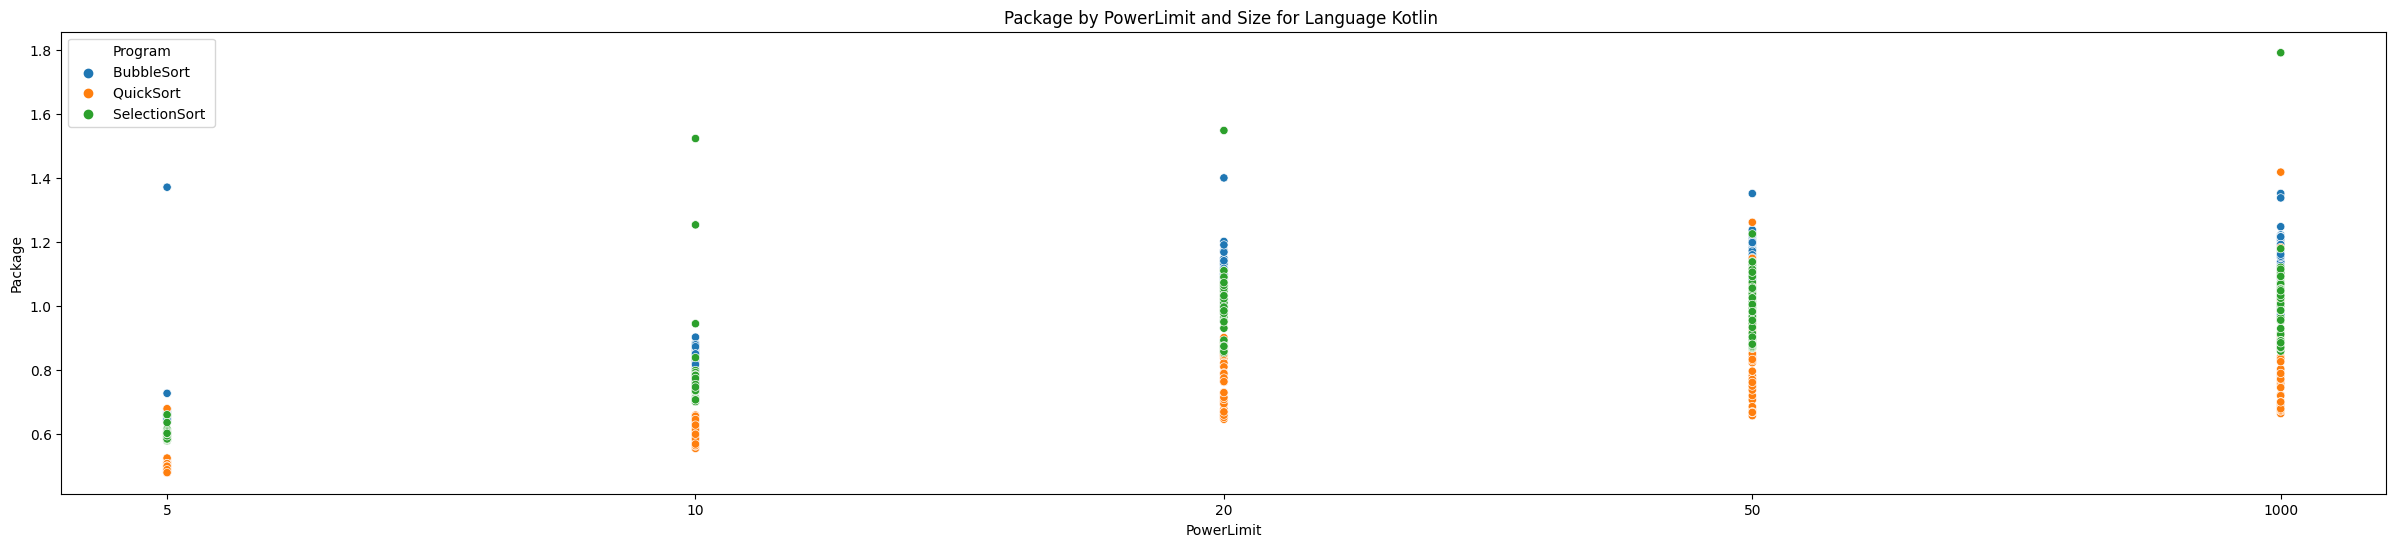

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


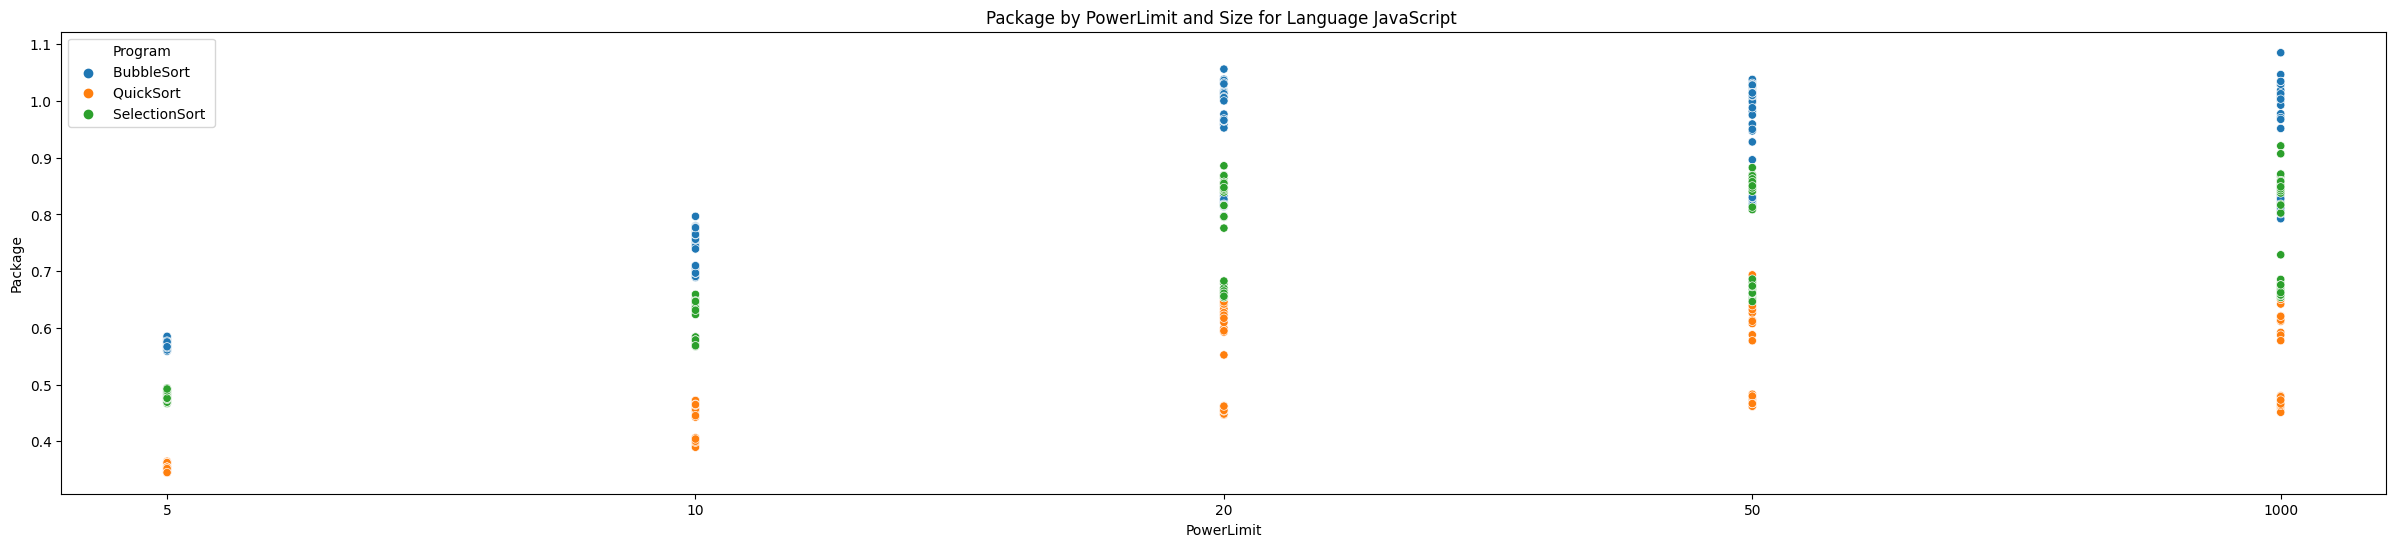

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


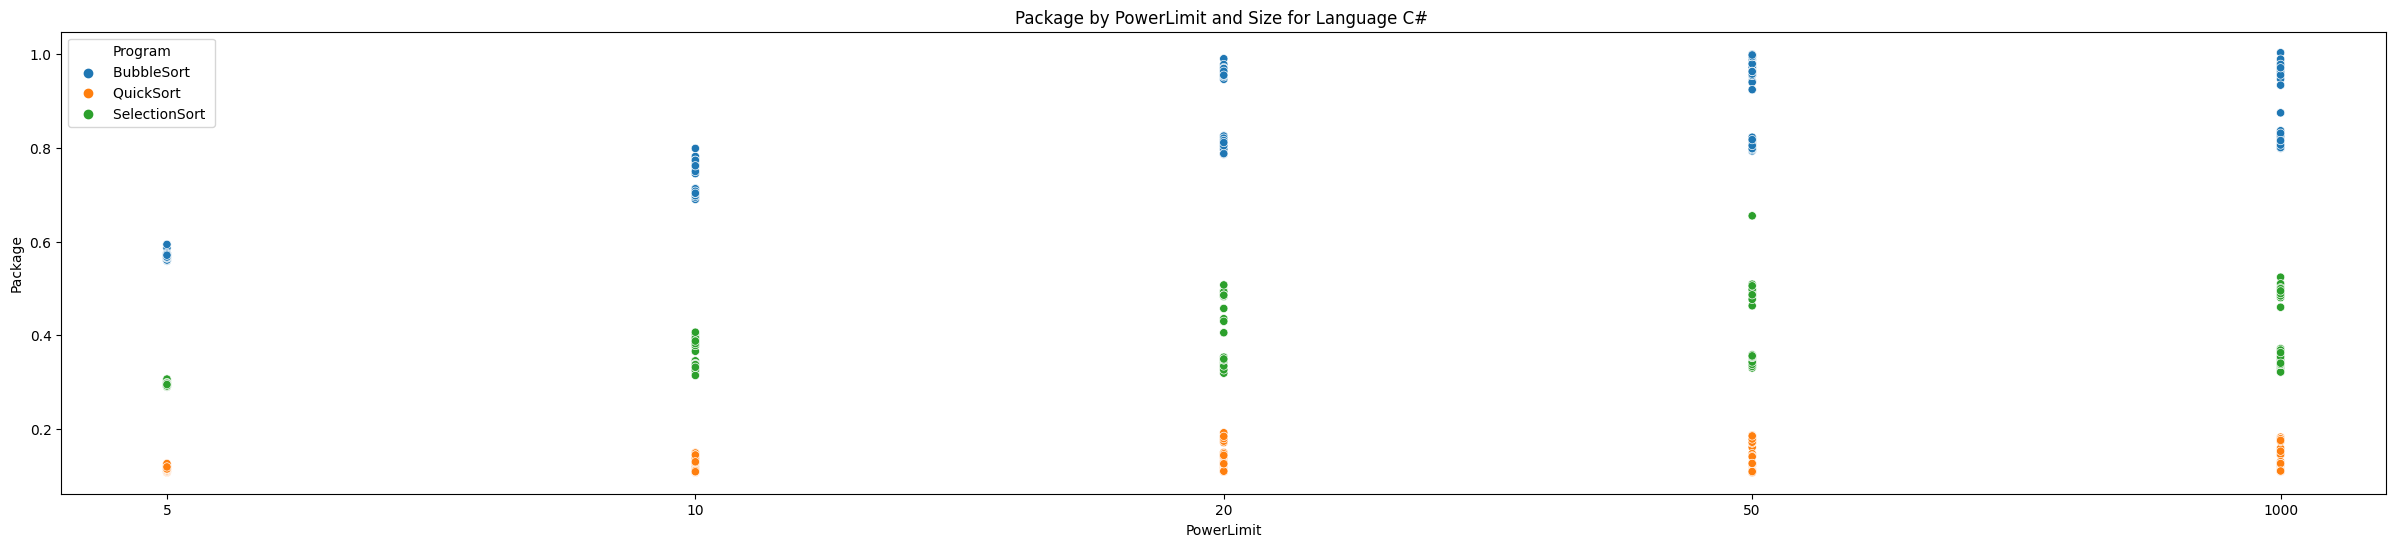

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


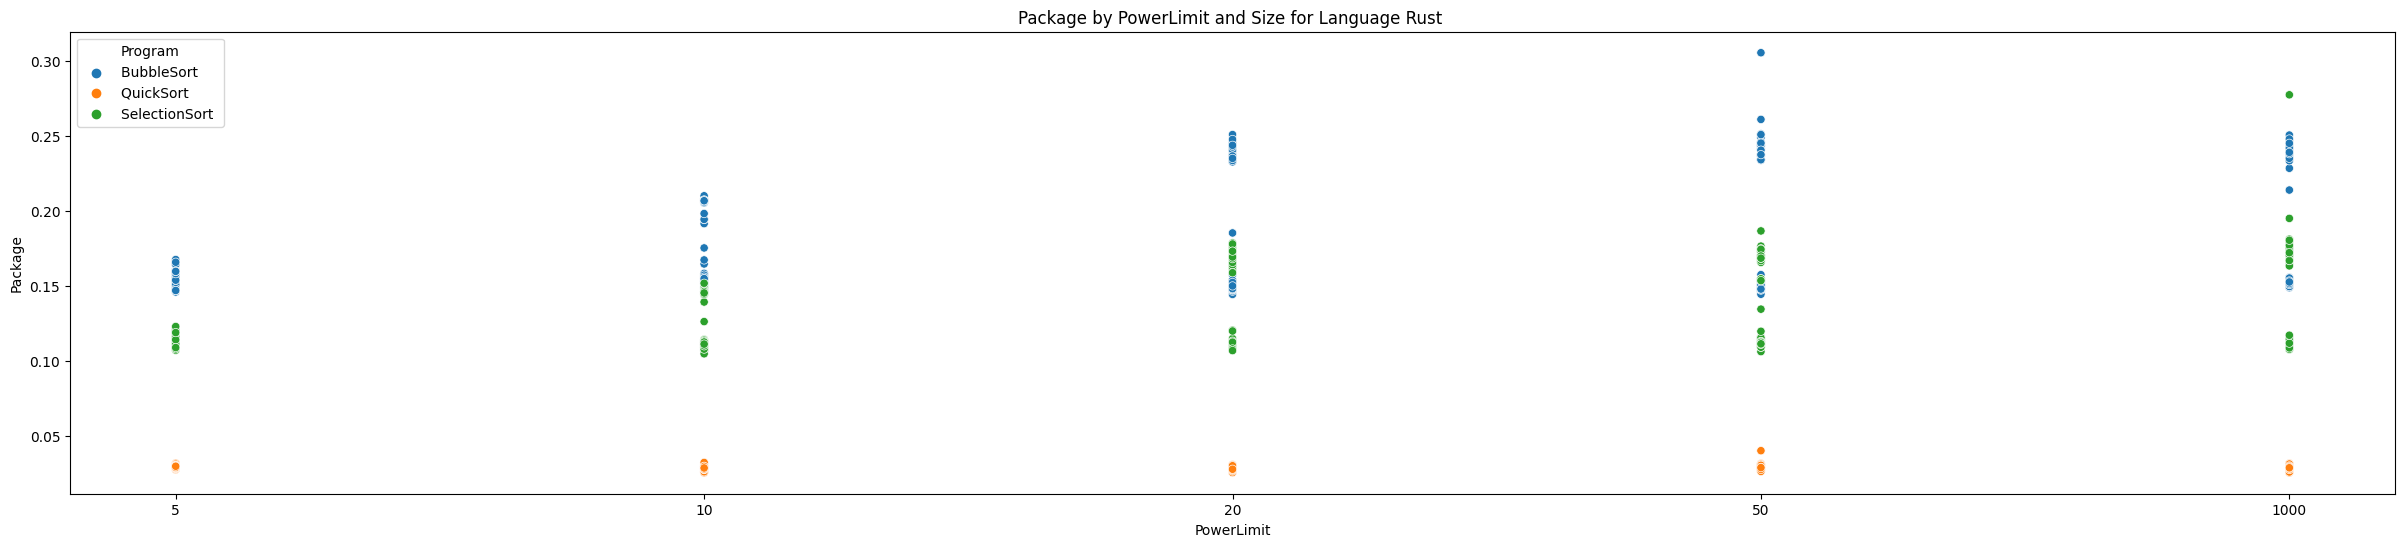

/tmp/ipykernel_533033/3656231740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


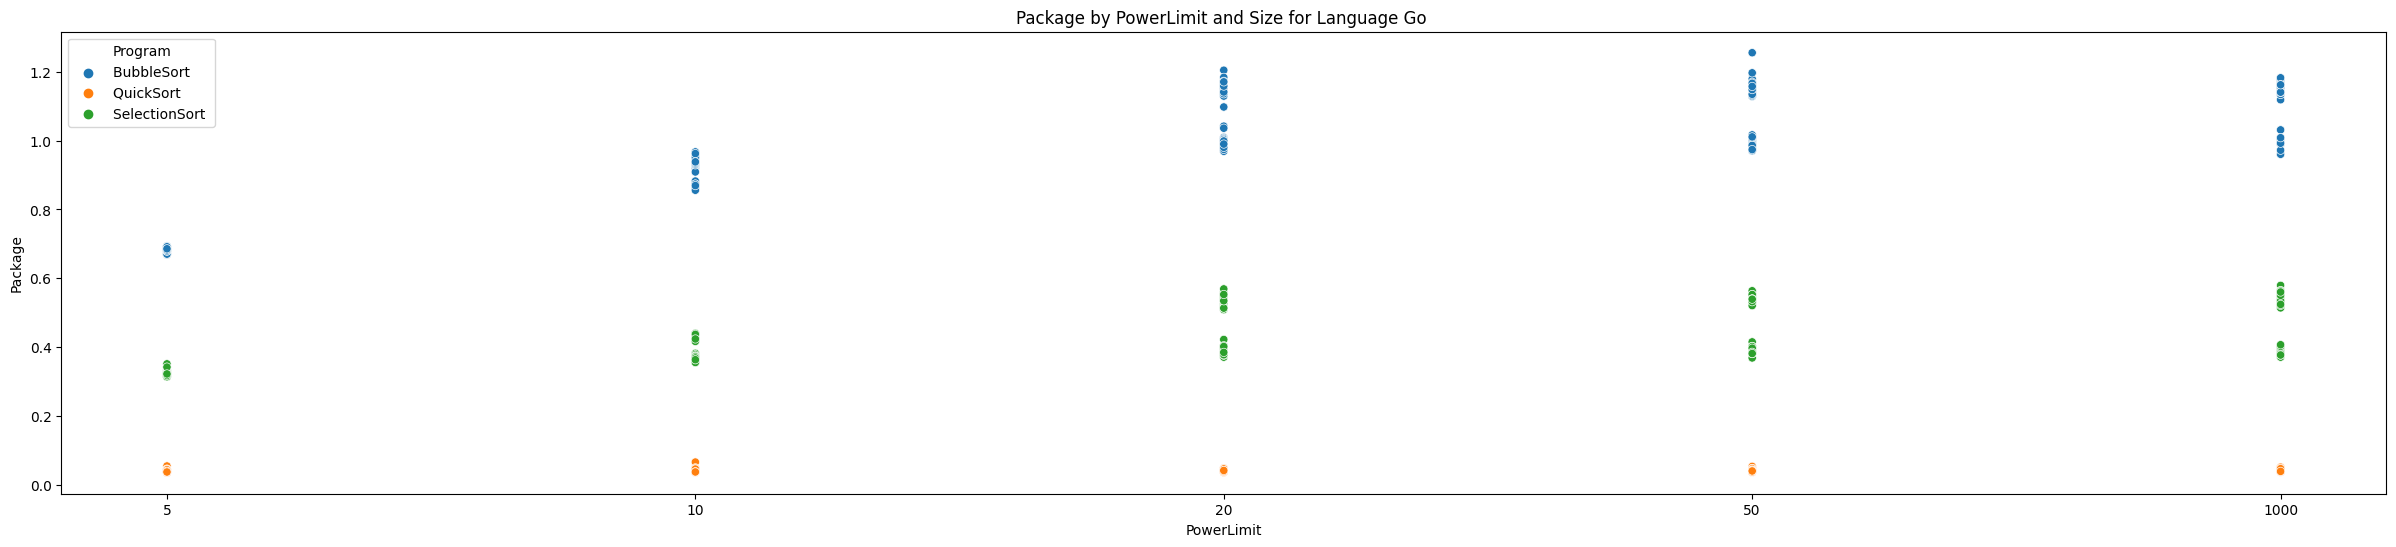

In [9]:
import matplotlib.pyplot as plt
import seaborn as sea

# Columns for comparison
columns = ["Time", "Package"]
group_column = "PowerLimit"  # Specify the column to group by

# Iterate over the columns
for col in columns:
    languages = df['Language'].unique()
    for language in languages:
        if col == 'Memory':
            plt.figure(figsize=(30, 20))
        else:
            plt.figure(figsize=(30, 6))
        
        data_subset = df[(df['Language'] == language) & (df['Size'] == 5000)]
        data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)
        
        ax = sea.scatterplot(data=data_subset, x=group_column, y=col, hue='Program')  # Add size='Size' parameter
        
        plt.xlabel(group_column)
        plt.ylabel(col)
        plt.title(f'{col} by {group_column} and Size for Language {language}')
        
        plt.legend(title='Program')
        plt.show()


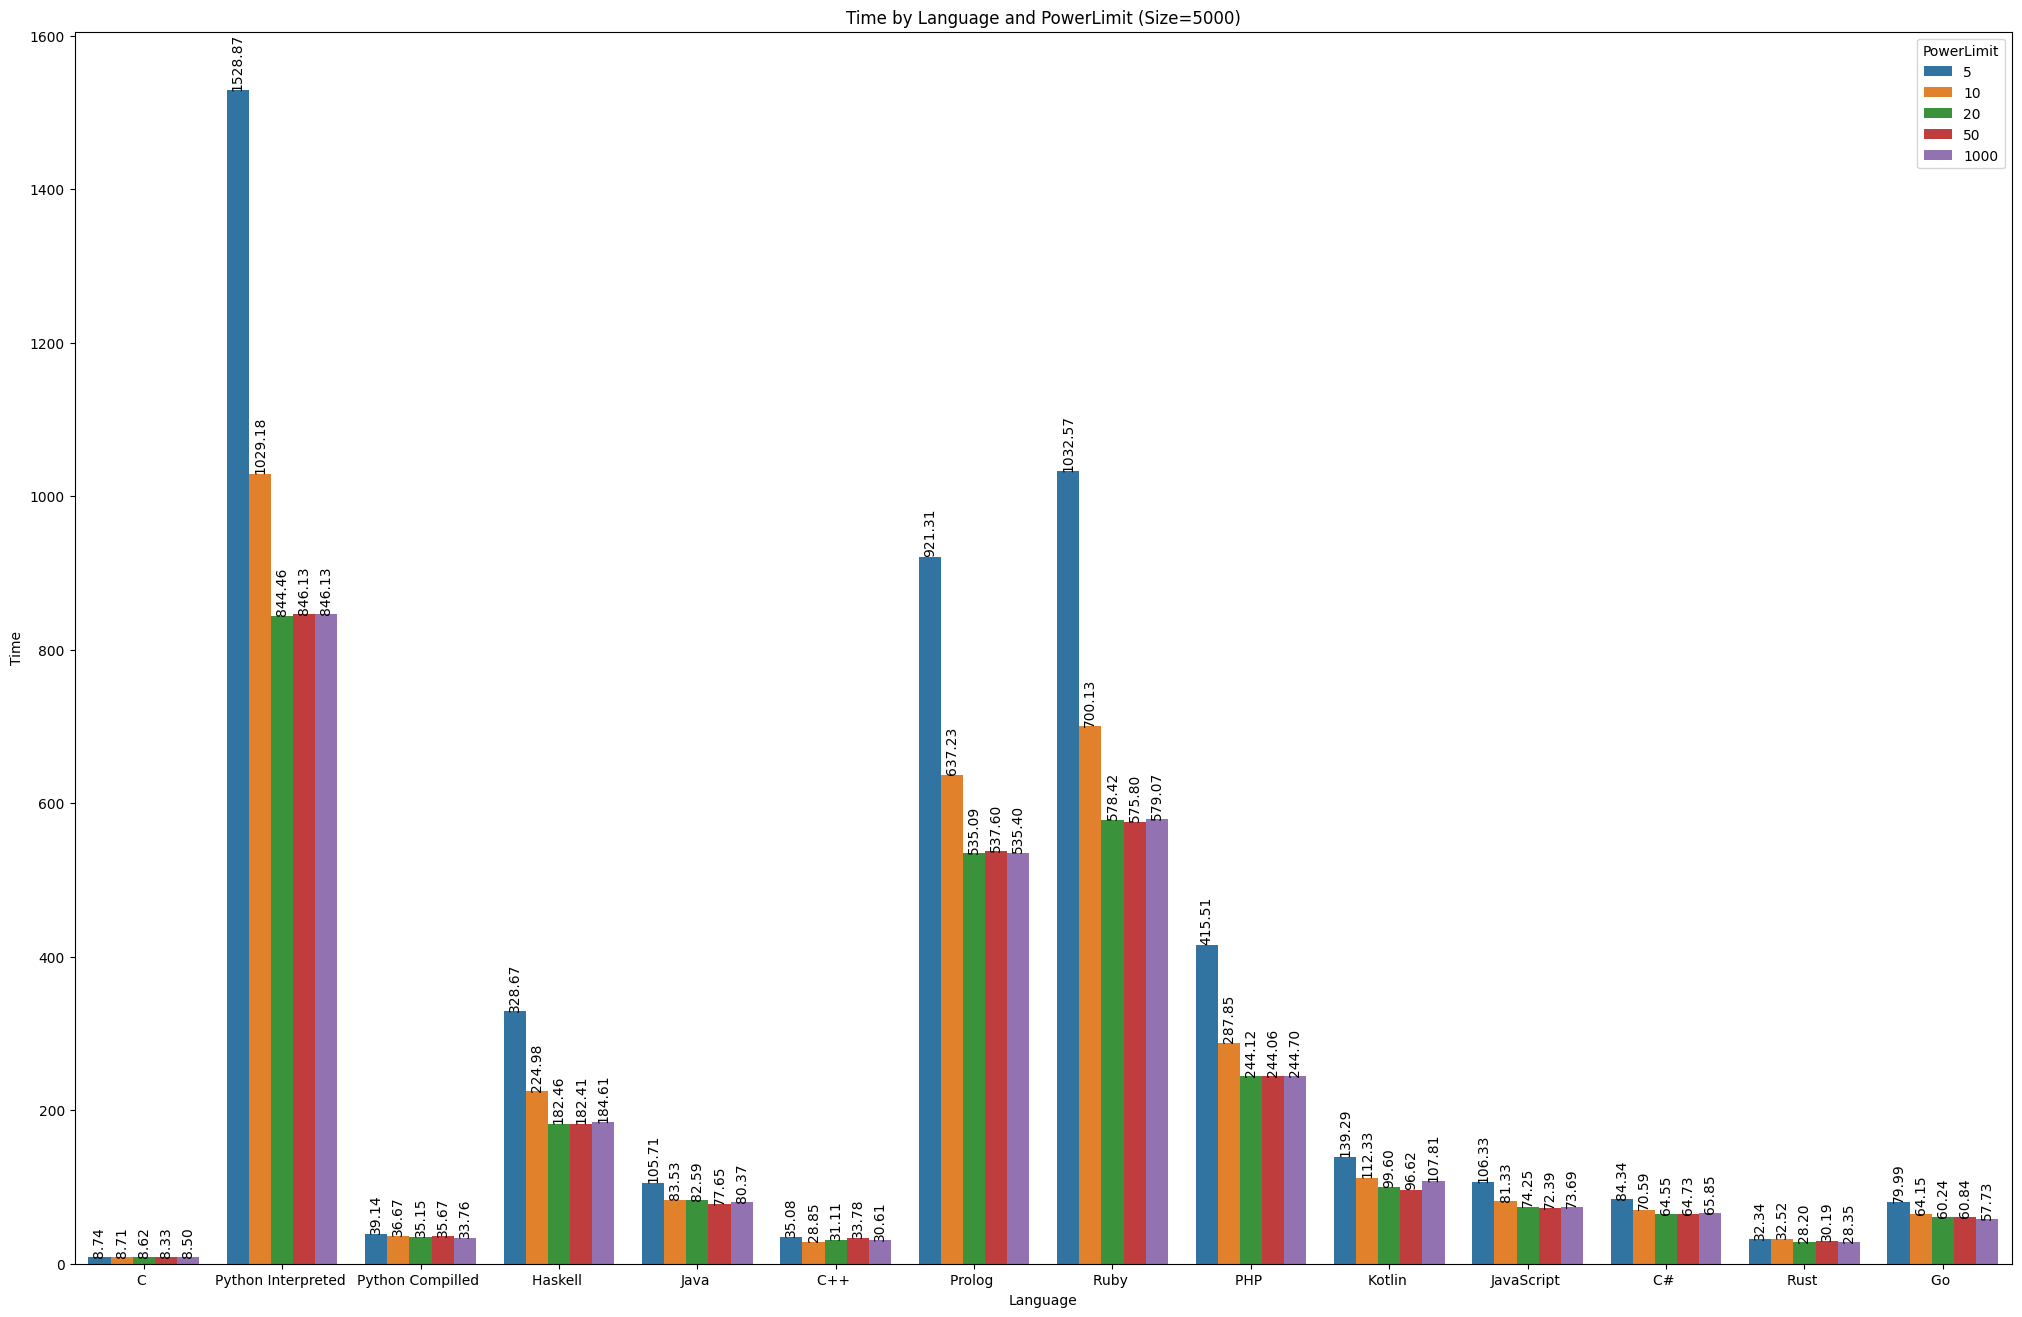

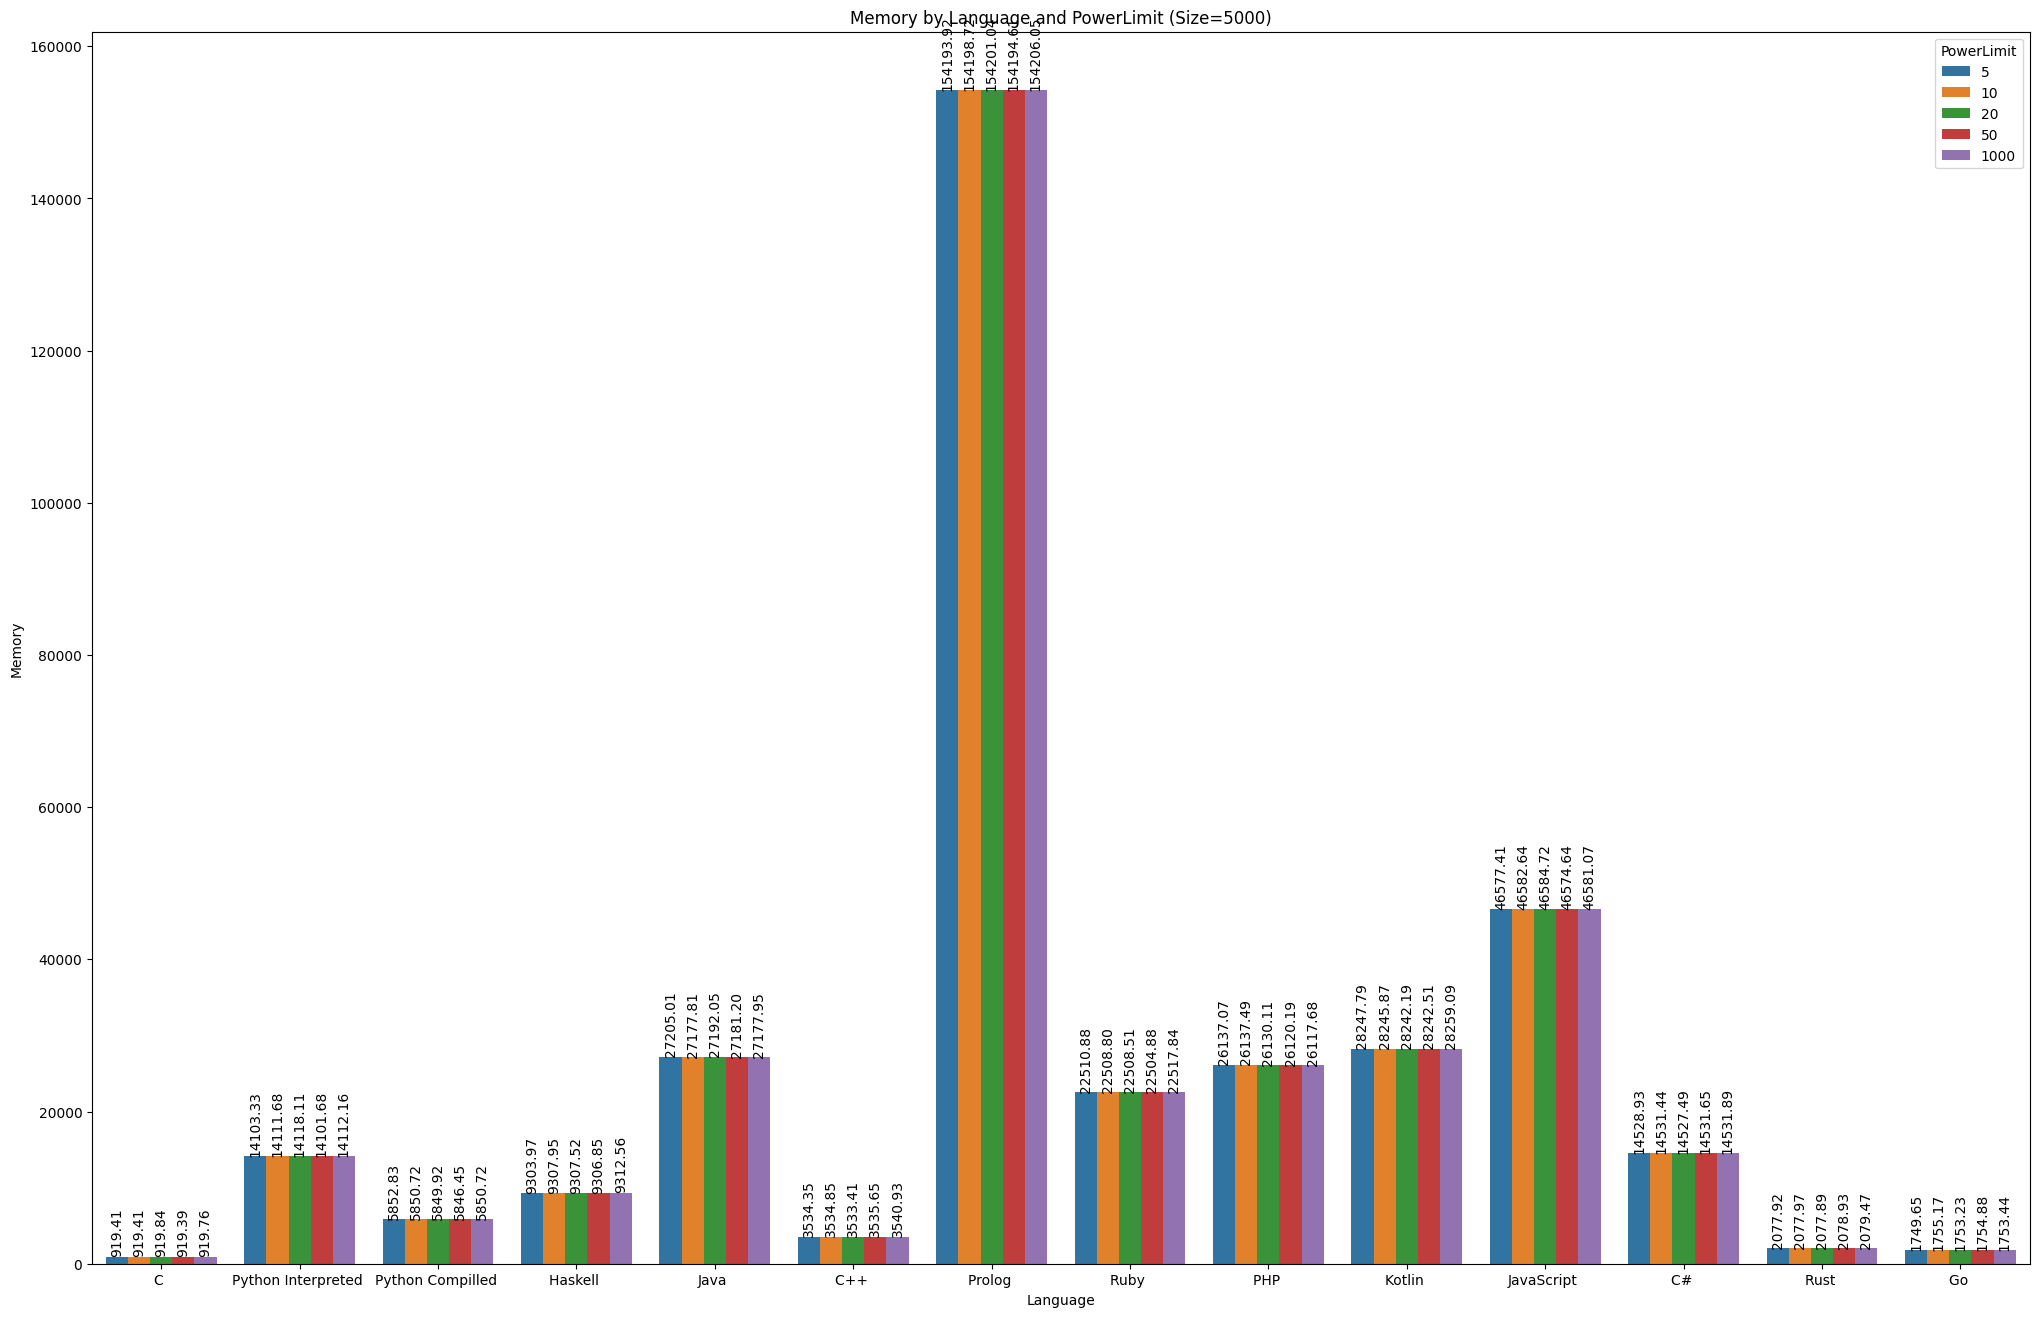

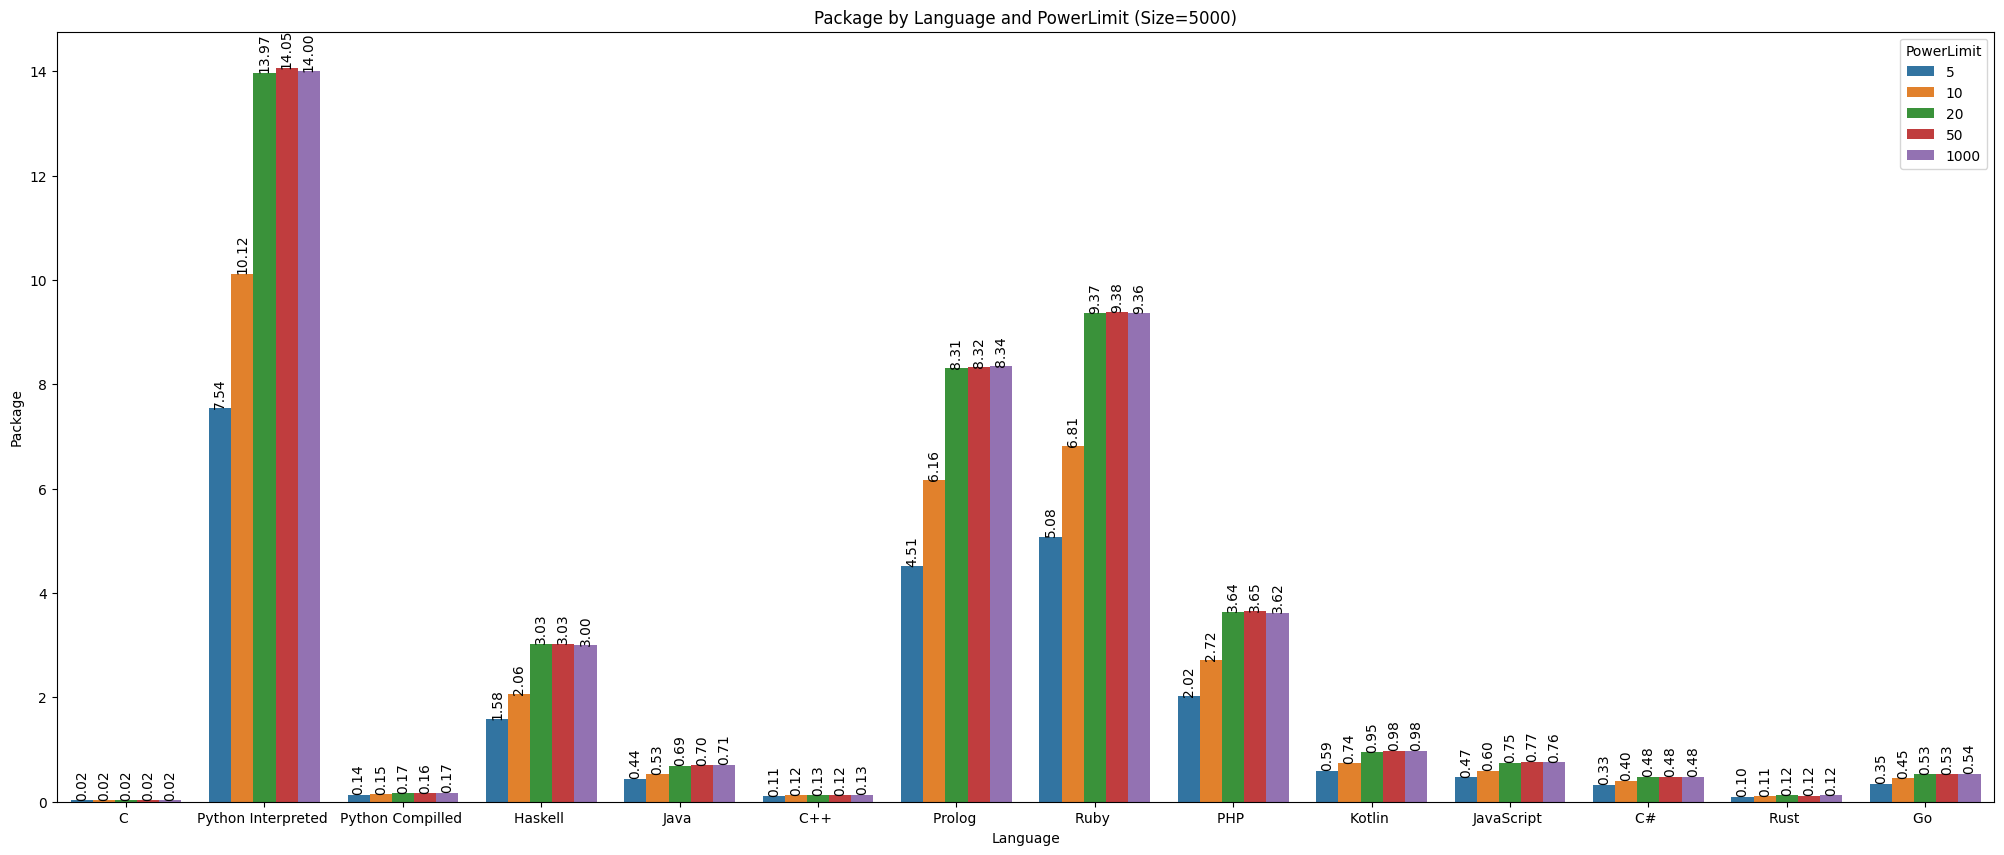

In [11]:
import matplotlib.pyplot as plt
import seaborn as sea

size = 5000

for col in ["Time", "Memory", "Package"]:
    if col in ["Time", "Memory"]:
        plt.figure(figsize=(25, 16))  # Aumenta a altura do gráfico
    else:
        plt.figure(figsize=(25, 10))  # Tamanho padrão
    
    data_subset = df[df['Size'] == size]
    hue_labels = ["No PowerLimit" if val == -1 else val for val in data_subset['PowerLimit']]
    ax = sea.barplot(data=data_subset, x='Language', y=col, hue=hue_labels, errorbar=None)
    plt.xlabel('Language')
    plt.ylabel(col)
    plt.title(f'{col} by Language and PowerLimit (Size={size})')
    plt.legend(title='PowerLimit')

    # Add the measured values on top of each bar
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        
        ax.text(x + width / 2, y + height, format(height, '.2f'),
                ha='center', va='bottom', rotation='vertical')

    plt.show()


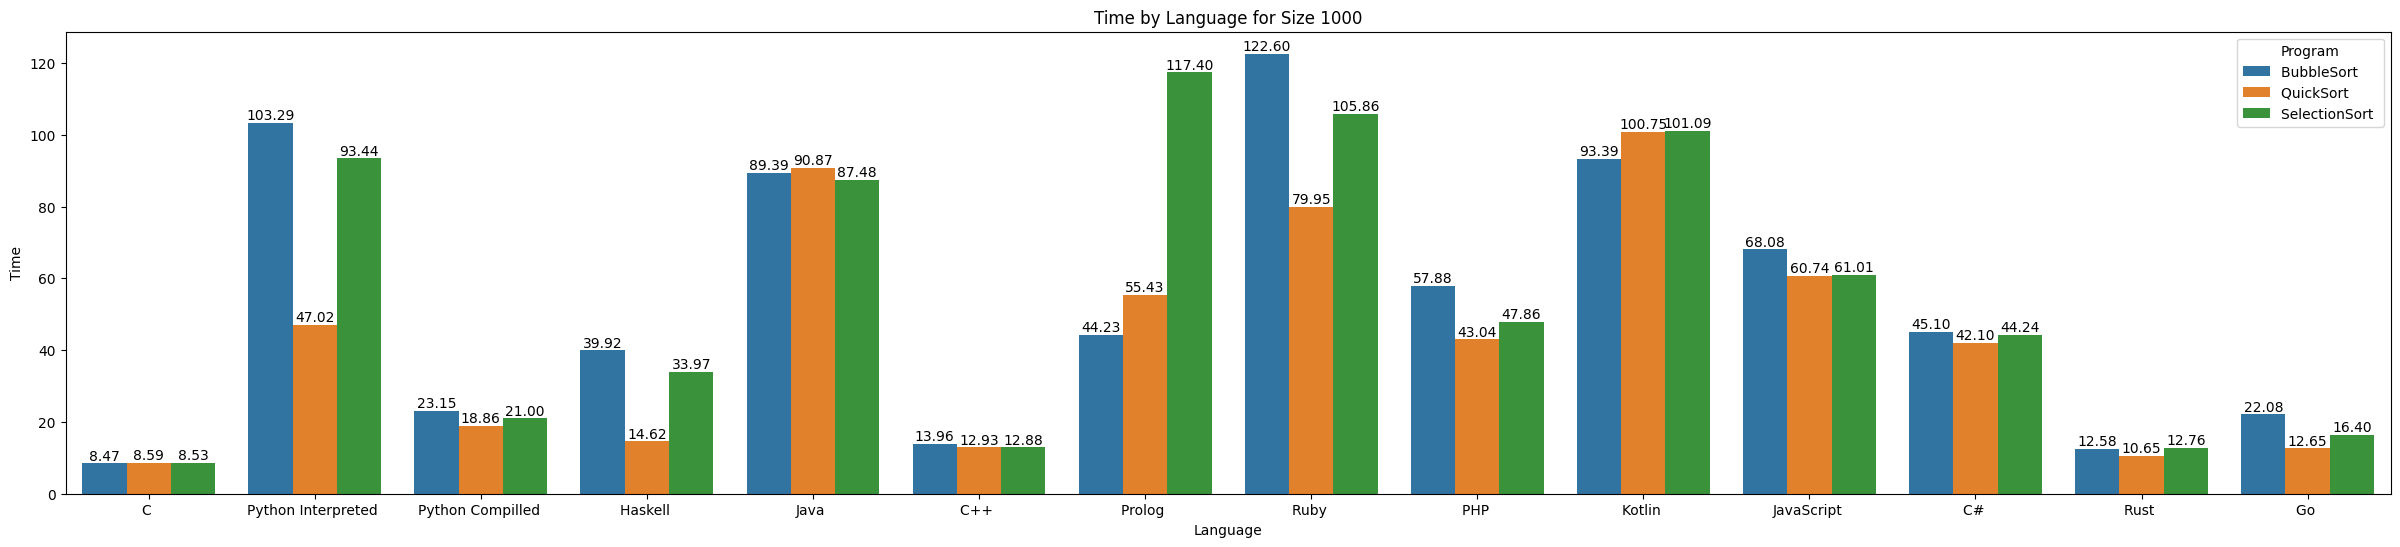

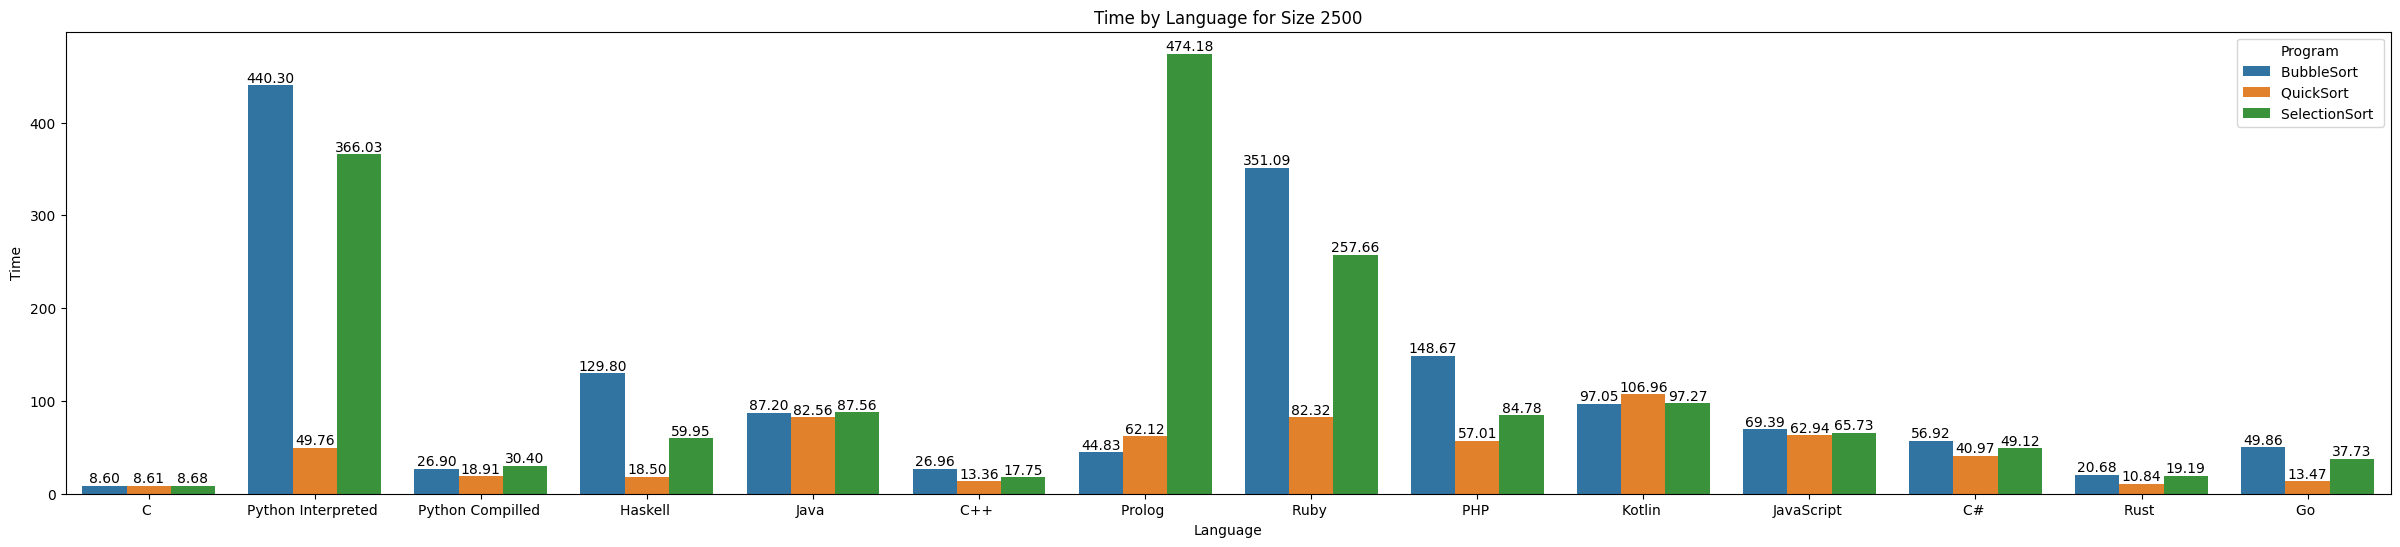

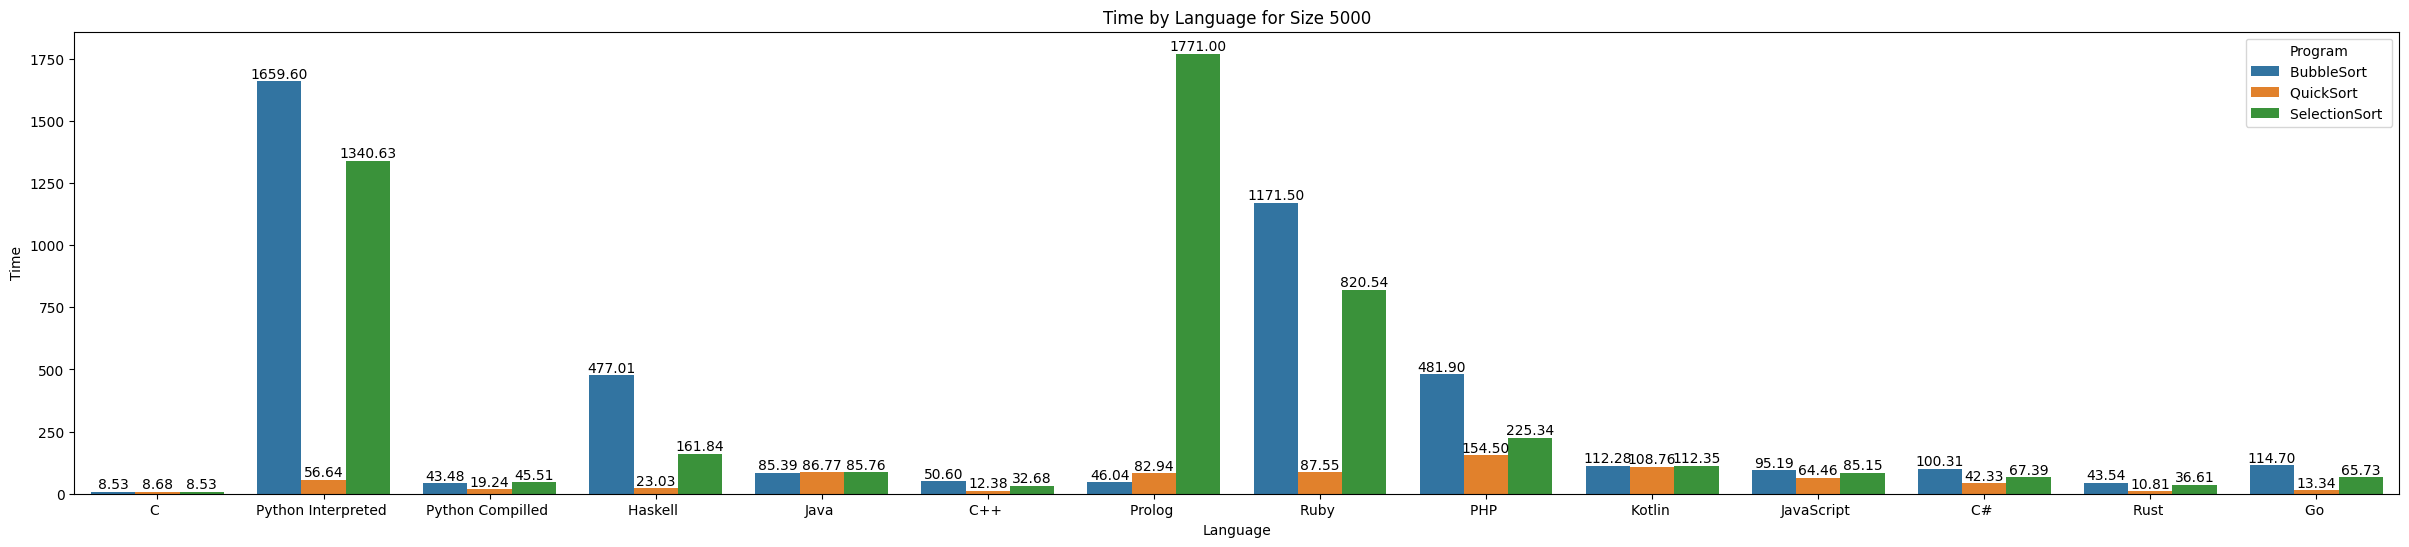

In [12]:
import matplotlib.pyplot as plt
import seaborn as sea

# Valor da coluna para comparação
col = "Time"

# Criar um gráfico de barras agrupadas na orientação vertical para cada valor único da coluna "Size"
for size in df['Size'].unique():
    plt.figure(figsize=(30, 6))
    subset = df[df['Size'] == size]
    ax = sea.barplot(data=subset, x='Language', y=col, hue='Program', errorbar=None)
    plt.xlabel('Language')
    plt.ylabel(col)
    plt.title(f'{col} by Language for Size {size}')
    plt.legend(title='Program')
    #ax.set_xticklabels(df['Language'].unique(), rotation=90)  # Definir os rótulos do eixo x como as línguas

    # Adicionar os valores medidos na vertical em cima de cada barra
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, format(height, '.2f'),
                ha='center', va='bottom', rotation='horizontal')

    plt.show()


/home/simao/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


[2.25924432e-04 2.49565626e-06 6.71126228e-06 2.01124826e-04]


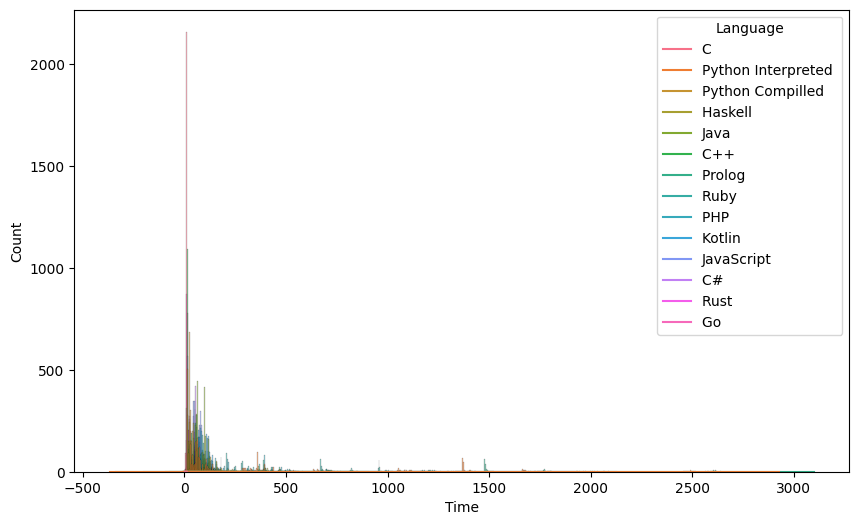

In [13]:
# Histogram and density estimation
from sklearn.neighbors import KernelDensity
import numpy as py

plt.figure(figsize=(10,6))
sea.histplot(data=df, hue='Language', x='Time')
# kernel density estimation for distr
sea.kdeplot(data=df, hue='Language', x='Time')

kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(df[['Package', 'Time']])
# exemplo de uma amostra de novos casos para estimar prob
novos = py.array([[0.15, 3.0], [1.222, 0.3], [1.004, 0.5], [0.10, 2.51]])

# log-likelihood (probability) density dos novos casos
log_dens = kde.score_samples(novos) 
print(py.exp(log_dens))

PearsonRResult(statistic=0.8747153416855907, pvalue=0.0)
ro=0.9090039640051394  p=0.0
tau=0.7541839495199267  p=0.0


Text(0, 0.5, 'Time')

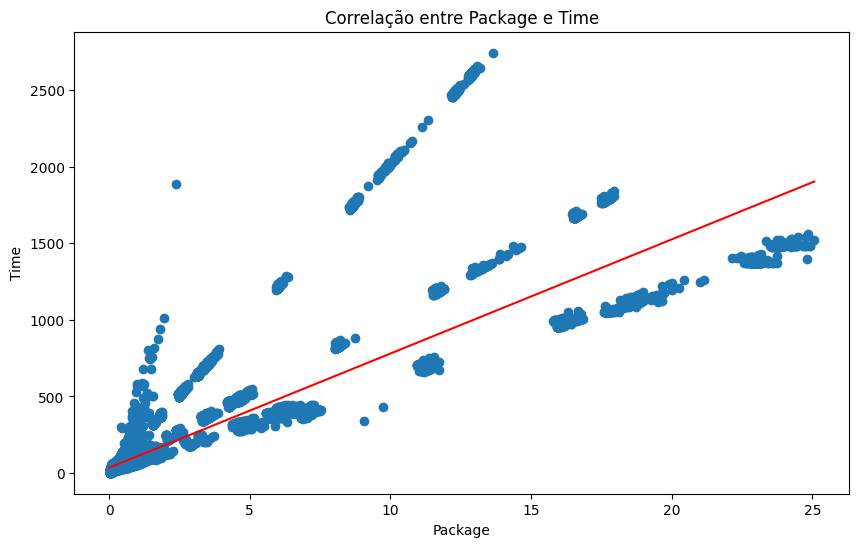

In [14]:
#  Pearson Corr Coef

p = stats.pearsonr(df['Package'], df['Time'])
"""Aqui pvalue é usado no sentido da prob de encontrar
 este resultado se de facto PearsonCorr fosse = 0.
 Se pvalue < 0.05 então a correlation é significativa
 """
print(p)

ro, pvalue1 = stats.spearmanr(df['Package'], df['Time'])
tau, pvalue2 = stats.kendalltau(df['Package'], df['Time'])
print("ro="+str(ro)  +"  p="+ str(pvalue1))
print("tau="+str(tau)+"  p="+str(pvalue2))

plt.figure(figsize=(10,6))
plt.title('Correlação entre Package e Time')
 
# plot the data
plt.scatter(df.Package, df["Time"])
 
# fits the best fitting line to the data
plt.plot(py.unique(df.Package),
         py.poly1d(py.polyfit(df.Package, df["Time"], 1))
         (py.unique(df.Package)), color='red')
 
# Labelling axes
plt.xlabel('Package')
plt.ylabel('Time')


<Axes: xlabel='Time', ylabel='Language'>

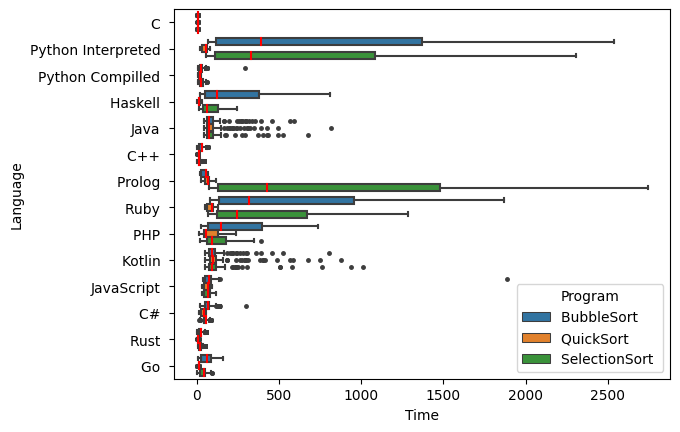

In [15]:
sea.boxplot(data=df,hue='Program',x='Time',y='Language',medianprops={"color":"red"},
            flierprops={"marker": "."},)